
# Predictive-Modelling-Using-Social-Profile-in-Online-P2P-Lending-Portal

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing the required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from datetime import datetime
from sklearn.metrics import mutual_info_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the prosperLoanData dataset.
df=pd.read_csv("/content/drive/MyDrive/prosperLoanData.csv")
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [ ]:
# shape of the dataset
df.shape

(113937, 81)

In [ ]:
# information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [ ]:
#summary statistics test
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


**Unique values:** It refer to distinct or different values in a dataset.

 A unique value occurs only once in the dataset, and it can be used to identify individual observations or instances.

**Duplicate values:** It refer to the presence of multiple identical or nearly identical examples or instances in a dataset.

These duplicates can lead to biased models and inaccurate predictions because they increase the weight of those duplicated examples in the training process, potentially leading the model to overemphasize certain patterns or correlations.

In [ ]:
#Identify the duplicate data
print(df['ListingKey'].nunique())
print(df['ListingNumber'].nunique())
print(df['LoanKey'].nunique())
print(df['LoanNumber'].nunique())
print(df['MemberKey'].nunique())

113066
113066
113066
113066
90831


In [ ]:
 #Remove duplicate data 
df.drop_duplicates(subset = 'ListingKey', inplace = True)
df.drop_duplicates(subset = 'ListingNumber', inplace = True)
df.drop_duplicates(subset = 'LoanKey', inplace = True)
df.drop_duplicates(subset = 'LoanNumber', inplace = True)
df.drop_duplicates(subset = 'MemberKey', inplace = True)

In [ ]:
#After removing duplicate data we will check the shape of dataset.
df.shape

(90831, 81)

**Missing values:**It refer to the absence of a particular value or observation in a dataset. 

These missing values can occur due to various reasons such as human errors during data entry, data corruption during transmission or storage, or simply because the data was never collected in the first place.

In [ ]:
# Finding the missing values 
columns=df.columns
for i in columns:
  print(i,sum(pd.isnull(df[i])))

ListingKey 0
ListingNumber 0
ListingCreationDate 0
CreditGrade 67003
Term 0
LoanStatus 0
ClosedDate 49801
BorrowerAPR 20
BorrowerRate 0
LenderYield 0
EstimatedEffectiveYield 23895
EstimatedLoss 23895
EstimatedReturn 23895
ProsperRating (numeric) 23895
ProsperRating (Alpha) 23895
ProsperScore 23895
ListingCategory (numeric) 0
BorrowerState 4360
Occupation 3190
EmploymentStatus 1927
EmploymentStatusDuration 6604
IsBorrowerHomeowner 0
CurrentlyInGroup 0
GroupKey 80587
DateCreditPulled 0
CreditScoreRangeLower 510
CreditScoreRangeUpper 510
FirstRecordedCreditLine 606
CurrentCreditLines 6590
OpenCreditLines 6590
TotalCreditLinespast7years 606
OpenRevolvingAccounts 0
OpenRevolvingMonthlyPayment 0
InquiriesLast6Months 606
TotalInquiries 996
CurrentDelinquencies 606
AmountDelinquent 6606
DelinquenciesLast7Years 854
PublicRecordsLast10Years 606
PublicRecordsLast12Months 6590
RevolvingCreditBalance 6590
BankcardUtilization 6590
AvailableBankcardCredit 6541
TotalTrades 6541
TradesNeverDelinquent (

Here total dataset size is 90831

We can remove the columns with null values more than 50,000

Here the list of null values with more than 50,000

CreditGrade 67003

ClosedDate 49801

GroupKey 80587

TotalProsperLoans 82251

TotalProsperPaymentsBilled 82251

OnTimeProsperPayments 82251

ProsperPaymentsLessThanOneMonthLate 82251

ProsperPaymentsOneMonthPlusLate 82251

ProsperPrincipalBorrowed 82251

ProsperPrincipalOutstanding 82251

ScorexChangeAtTimeOfListing 83521

LoanFirstDefaultedCycleNumber 75779

As per Project the Creditgrade and closed date attributes are important features we will not remove them.

The below five are unique identifiers they don't show any effect in the model

ListingKey

ListingNumber

LoanKey

LoanNumber

MemberKey

In [ ]:
#The attributes which are not useful for project.
col=["GroupKey","TotalProsperLoans","TotalProsperPaymentsBilled","OnTimeProsperPayments","ProsperPaymentsLessThanOneMonthLate","ProsperPaymentsOneMonthPlusLate",
     "ProsperPrincipalBorrowed","ProsperPrincipalOutstanding","ScorexChangeAtTimeOfListing","LoanFirstDefaultedCycleNumber","ListingKey","ListingNumber","LoanKey",
     "LoanNumber","MemberKey","EstimatedEffectiveYield","EstimatedLoss","EstimatedReturn","ProsperRating (numeric)","ProsperRating (Alpha)","InvestmentFromFriendsCount",
     "Recommendations" , "LP_NonPrincipalRecoverypayments", "LP_NetPrincipalLoss", "LP_GrossPrincipalLoss","LP_CollectionFees","PercentFunded","LP_ServiceFees","LP_InterestandFees",
     "LP_CustomerPrincipalPayments","LP_CustomerPayments","InvestmentFromFriendsAmount","PublicRecordsLast10Years","PublicRecordsLast12Months"]


In [ ]:
# Drop the columns list.
for i in col :
  df=df.drop([i], axis='columns')

In [ ]:
#After removing columns list we will check the shape of dataset.
df.shape

(90831, 47)

# Handling the missing Data
**Iterative Imputer:** It is a machine learning technique used for missing data imputation. Missing data imputation refers to the process of replacing missing values in a dataset with estimates based on the available data.

The iterative imputer is a popular method for missing data imputation because it can handle missing data that is non-random and can capture the complex relationships between variables.

In [ ]:
#filling the float values with  iterative imputer by mean
df_cat_col = df.select_dtypes(include=('float')).columns
df_cat_col
for B in df_cat_col:
  imputer = IterativeImputer(max_iter=10, random_state=0)
  imputer = imputer.fit(df[[B]])
  df[B] = imputer.transform(df[[B]])
     

In [ ]:
#filling the object values with  iterative imputer by most_frequent
df_cat_col = df.select_dtypes(include=('object'),exclude=()).columns
df_cat_col = df_cat_col.drop('ClosedDate')
df_cat_col = df_cat_col.drop('LoanStatus')
for B in df_cat_col:
  imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
  imputer = imputer.fit(df[[B]])
  df[B] = imputer.transform(df[[B]])

In [ ]:
# check the attributes if the all null values are changed or not
columns=df.columns
for i in columns:
  print(i,sum(pd.isnull(df[i])))

ListingCreationDate 0
CreditGrade 0
Term 0
LoanStatus 0
ClosedDate 49801
BorrowerAPR 0
BorrowerRate 0
LenderYield 0
ProsperScore 0
ListingCategory (numeric) 0
BorrowerState 0
Occupation 0
EmploymentStatus 0
EmploymentStatusDuration 0
IsBorrowerHomeowner 0
CurrentlyInGroup 0
DateCreditPulled 0
CreditScoreRangeLower 0
CreditScoreRangeUpper 0
FirstRecordedCreditLine 0
CurrentCreditLines 0
OpenCreditLines 0
TotalCreditLinespast7years 0
OpenRevolvingAccounts 0
OpenRevolvingMonthlyPayment 0
InquiriesLast6Months 0
TotalInquiries 0
CurrentDelinquencies 0
AmountDelinquent 0
DelinquenciesLast7Years 0
RevolvingCreditBalance 0
BankcardUtilization 0
AvailableBankcardCredit 0
TotalTrades 0
TradesNeverDelinquent (percentage) 0
TradesOpenedLast6Months 0
DebtToIncomeRatio 0
IncomeRange 0
IncomeVerifiable 0
StatedMonthlyIncome 0
LoanCurrentDaysDelinquent 0
LoanMonthsSinceOrigination 0
LoanOriginalAmount 0
LoanOriginationDate 0
LoanOriginationQuarter 0
MonthlyLoanPayment 0
Investors 0


In [ ]:
df['LoanStatus'].value_counts()

Current                   48042
Completed                 25925
Chargedoff                10457
Defaulted                  4644
Past Due (1-15 days)        619
Past Due (31-60 days)       297
Past Due (61-90 days)       237
Past Due (91-120 days)      234
Past Due (16-30 days)       204
FinalPaymentInProgress      155
Past Due (>120 days)         13
Cancelled                     4
Name: LoanStatus, dtype: int64

In [ ]:
df.drop(df[(df['LoanStatus'] == 'Current')].index, inplace=True)

In [ ]:
df.drop(df[(df['LoanStatus'] == 'FinalPaymentInProgress')].index, inplace=True)

In [ ]:
df.shape

(42634, 47)

In [ ]:
df['LoanStatus'].value_counts()

Completed                 25925
Chargedoff                10457
Defaulted                  4644
Past Due (1-15 days)        619
Past Due (31-60 days)       297
Past Due (61-90 days)       237
Past Due (91-120 days)      234
Past Due (16-30 days)       204
Past Due (>120 days)         13
Cancelled                     4
Name: LoanStatus, dtype: int64

In [ ]:
df['LoanStatus']=df['ClosedDate'].apply(lambda x:1 if not pd.isnull(x) else 0)

In [ ]:
df['LoanStatus'].value_counts()

1    41030
0     1604
Name: LoanStatus, dtype: int64

In [ ]:
df['LoanCurrentDaysDelinquent'].value_counts()

0       25929
121       250
10        140
4          56
5          51
        ...  
1030        1
2171        1
2703        1
1104        1
1081        1
Name: LoanCurrentDaysDelinquent, Length: 2397, dtype: int64

In [ ]:
df['LoanStatus']=df['LoanCurrentDaysDelinquent'].apply(lambda x:1 if x>180 else 0)

In [ ]:
df['LoanStatus'].value_counts()

0    29238
1    13396
Name: LoanStatus, dtype: int64

In [ ]:
df.drop(['LoanCurrentDaysDelinquent','ClosedDate'],axis=1,inplace=True)

In [ ]:
df['IncomeRange'].replace(to_replace="Not employed", value="$0", inplace=True)
df['IncomeRange'].replace(to_replace="Not displayed", value="$0", inplace=True)

In [ ]:
df['IncomeRange'].value_counts()

$25,000-49,999    12603
$50,000-74,999     9508
$0                 7669
$75,000-99,999     4700
$100,000+          4438
$1-24,999          3716
Name: IncomeRange, dtype: int64

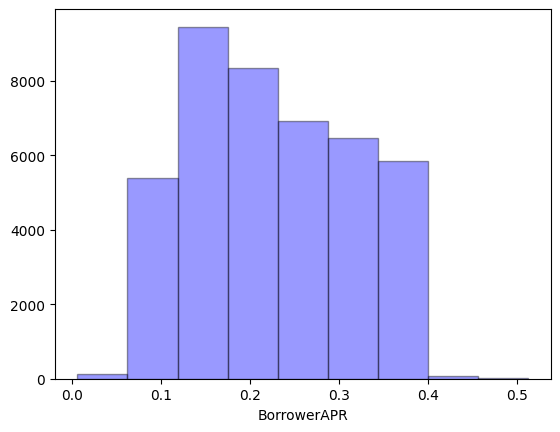

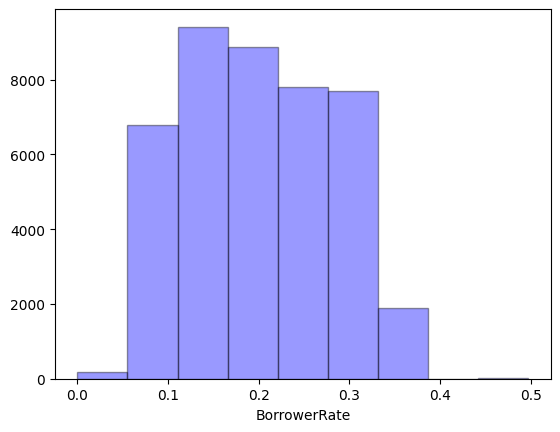

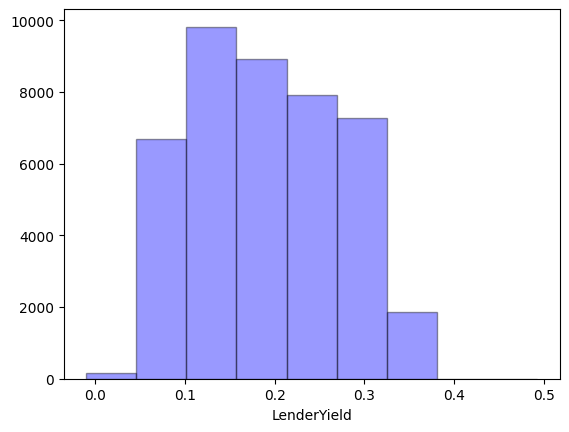

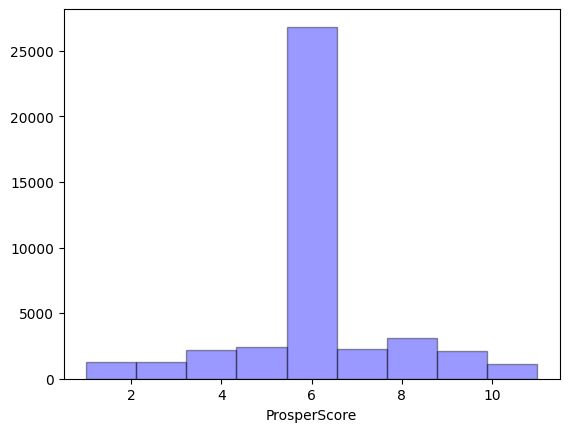

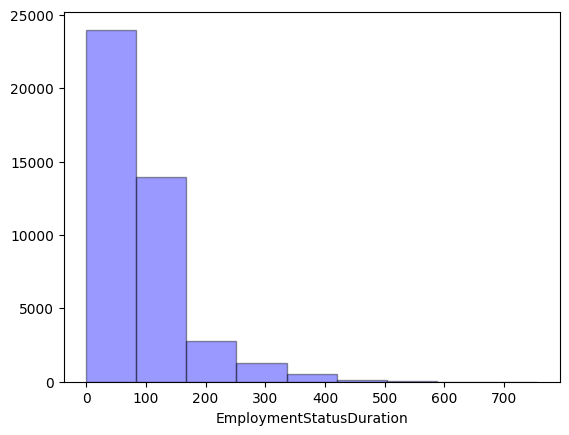

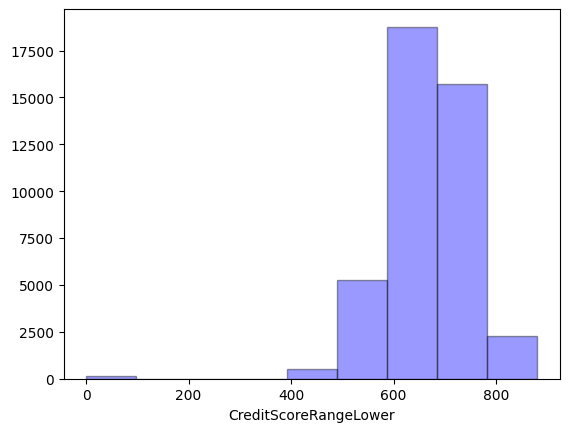

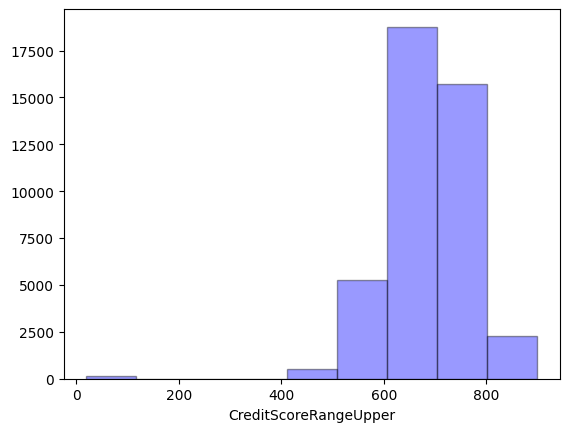

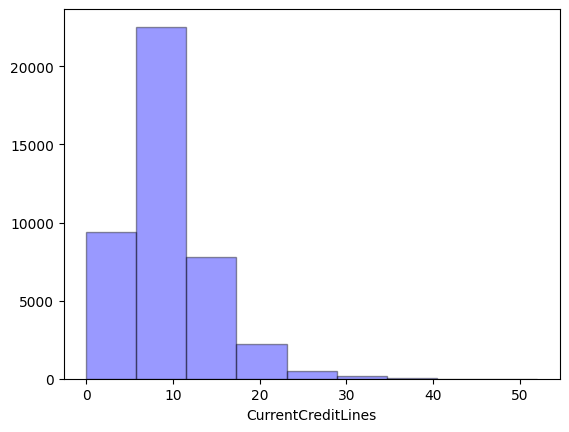

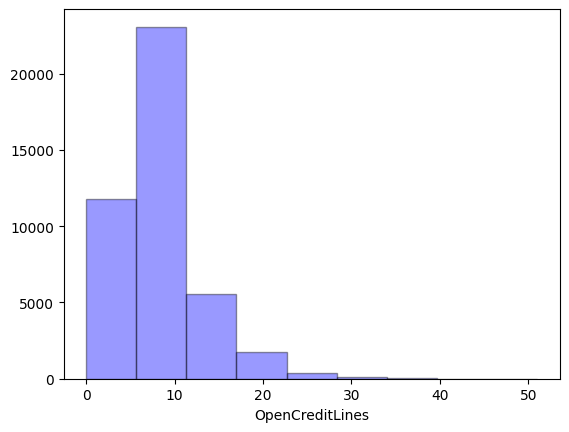

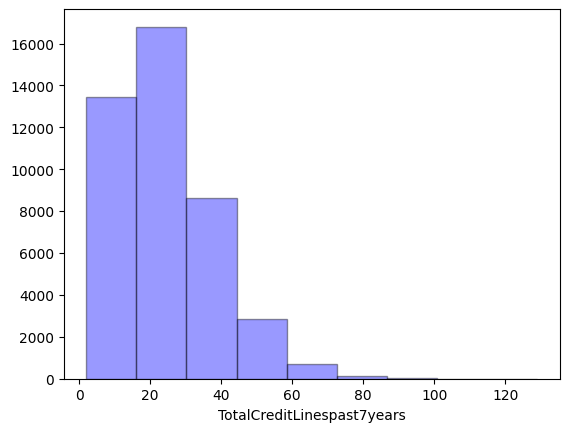

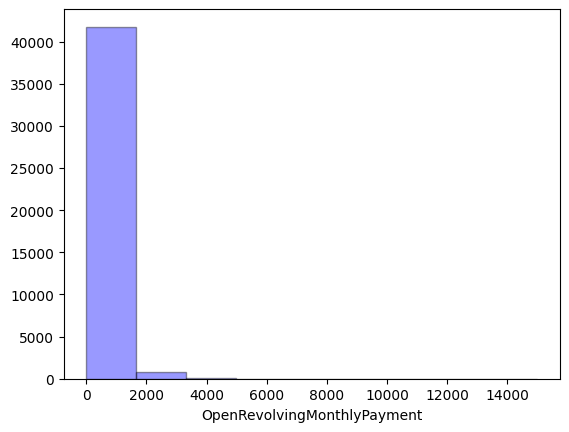

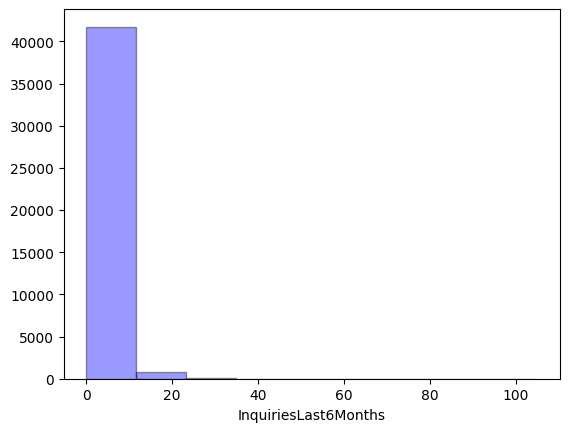

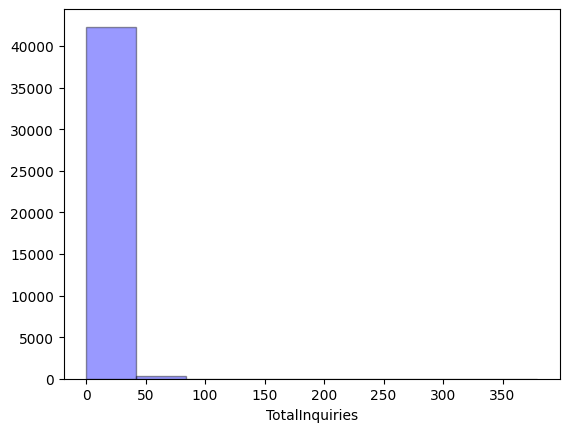

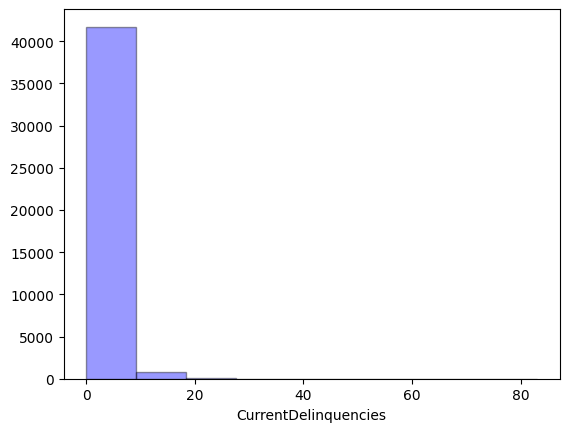

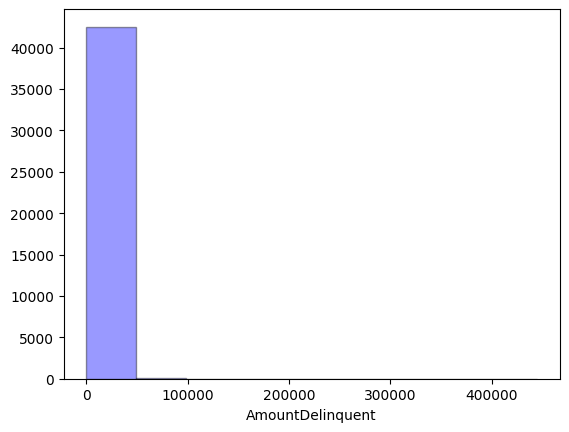

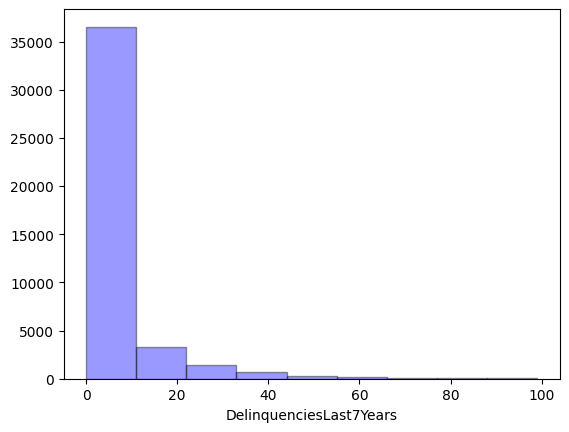

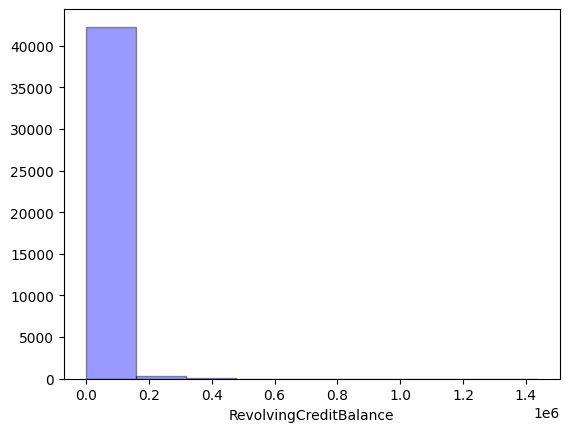

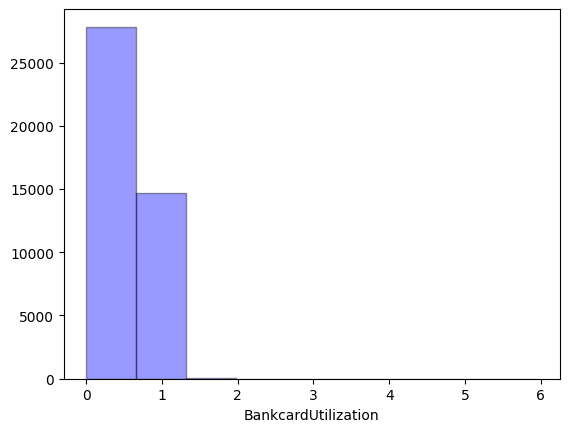

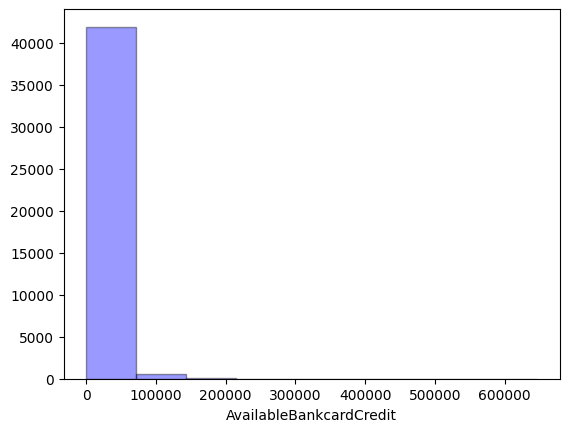

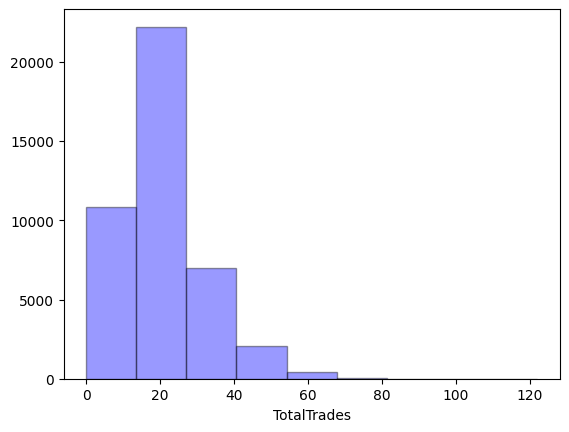

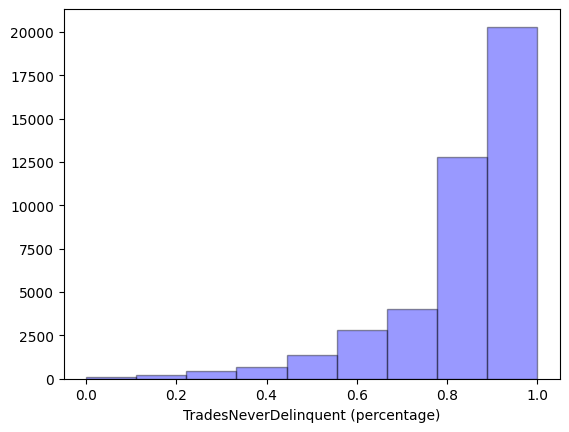

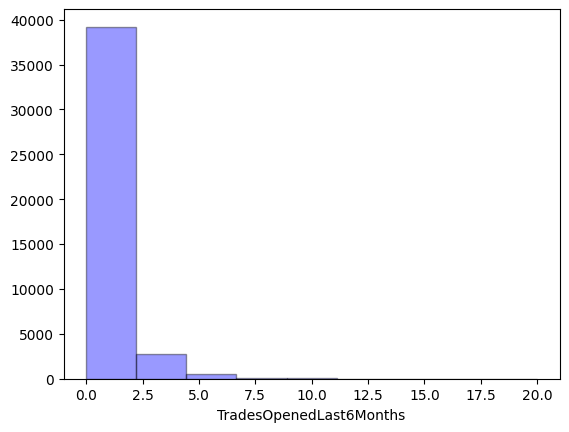

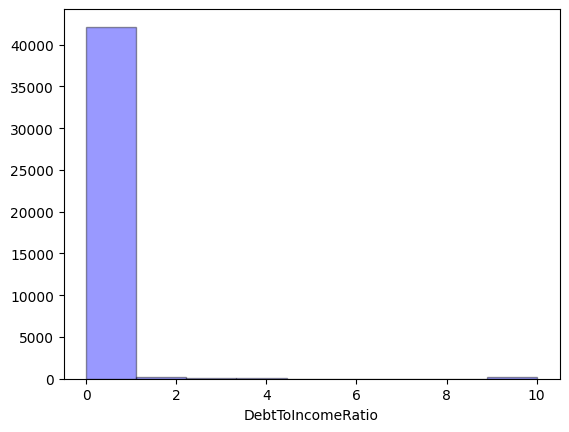

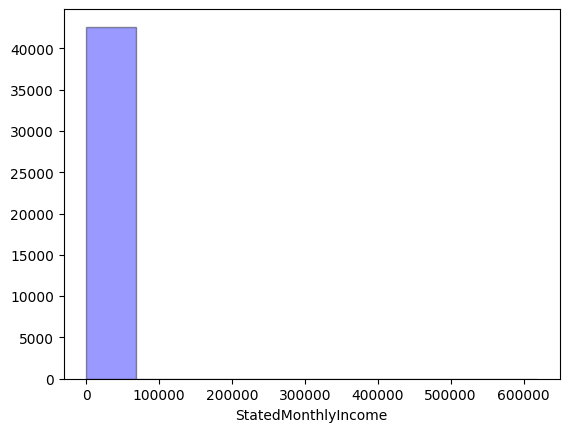

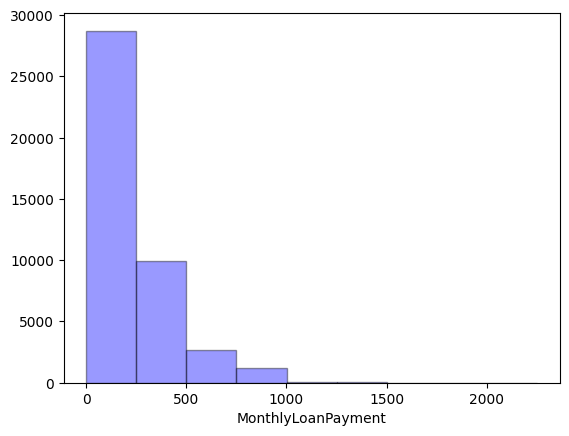

In [ ]:
# Distribution plot
col = df.select_dtypes(include=('float')).columns
for i in col :
  sns.distplot(df[i], hist=True, kde=False,bins=9, color = 'blue',hist_kws={'edgecolor':'black'})
  plt.show()

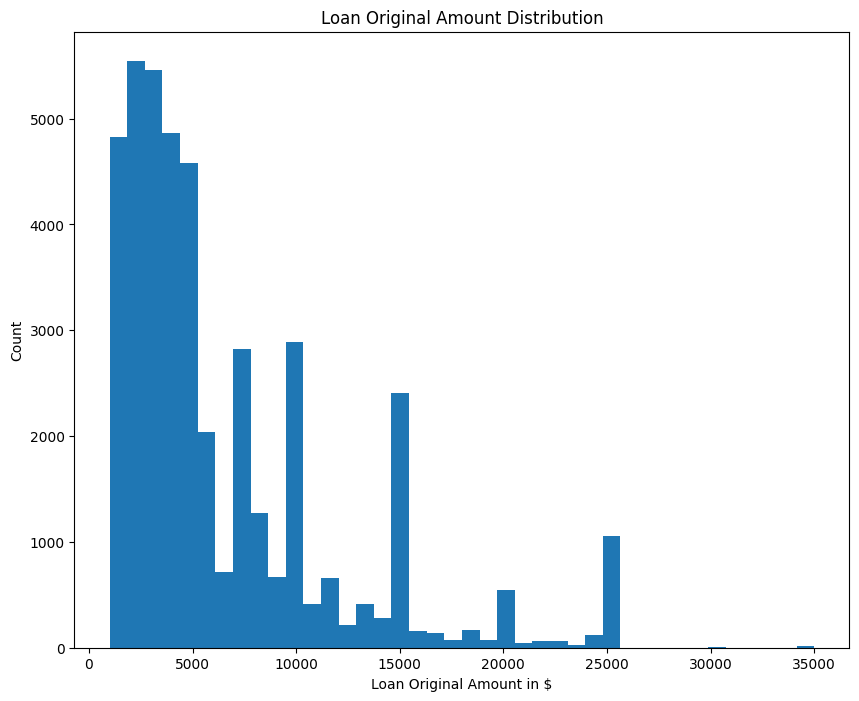

In [ ]:
# Loan Original Amount Distribution

plt.figure(figsize=[10, 8])
plt.hist(data = df, x = 'LoanOriginalAmount',bins=40)
plt.title('Loan Original Amount Distribution')
plt.xlabel('Loan Original Amount in $')
plt.ylabel('Count')
plt.show()

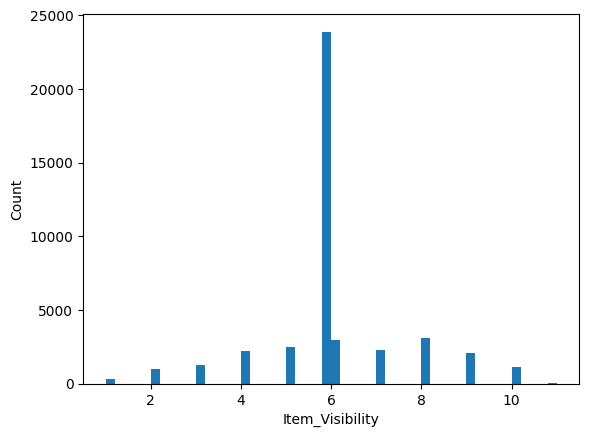

In [ ]:
plt.hist(df['ProsperScore'],bins=50)
plt.xlabel('Item_Visibility')
plt.ylabel('Count')
plt.show()

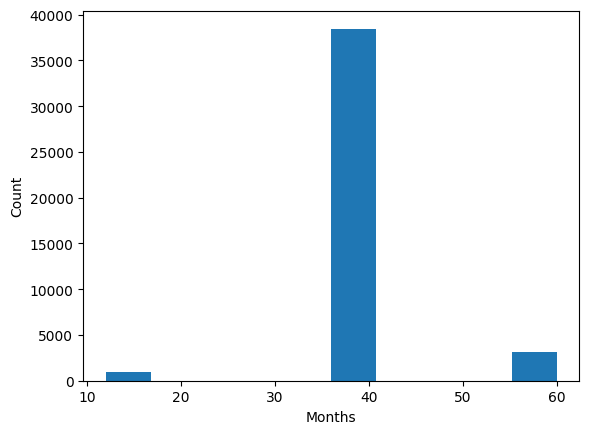

In [ ]:
plt.hist(df['Term'])
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()

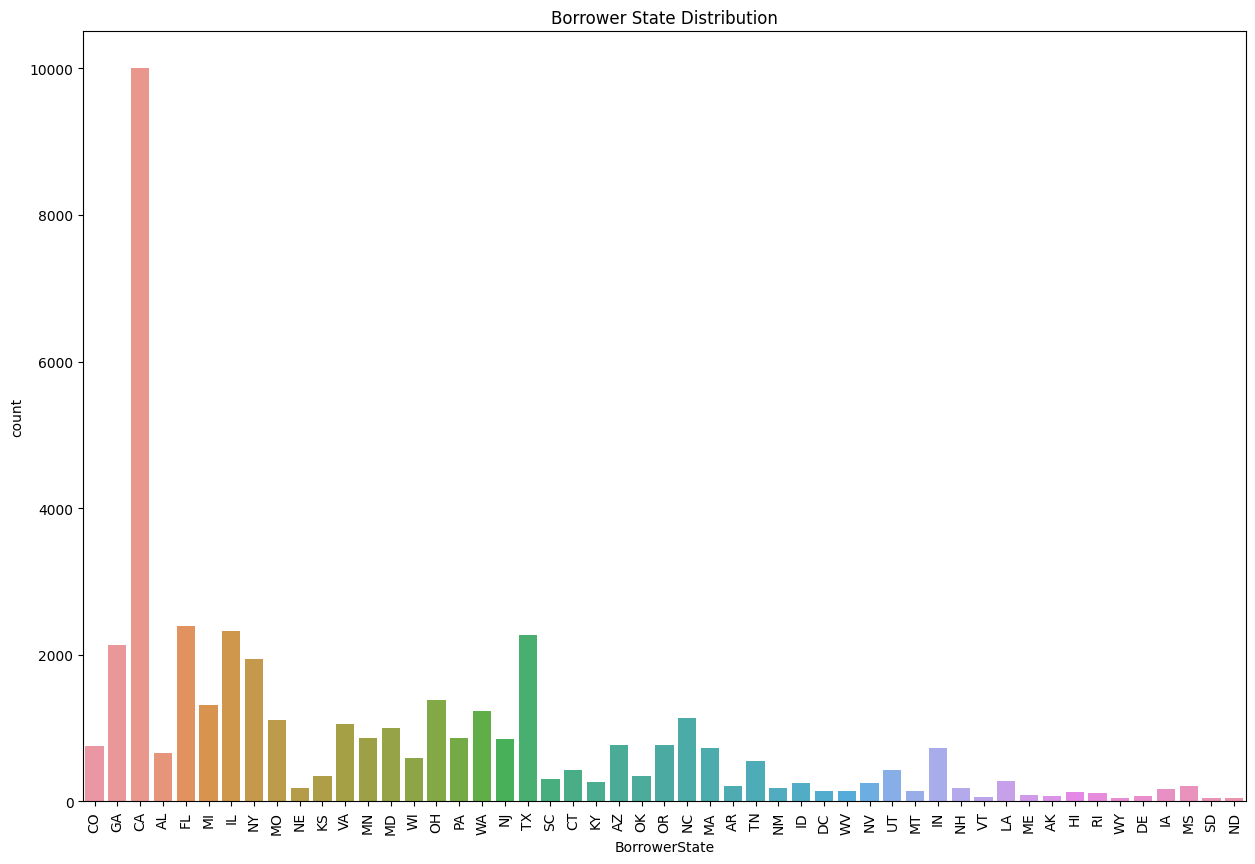

In [ ]:
#Borrower State Distrobution

plt.figure(figsize=[15, 10])
sns.countplot(data=df,x='BorrowerState');
plt.title('Borrower State Distribution');
plt.xticks(rotation=90);

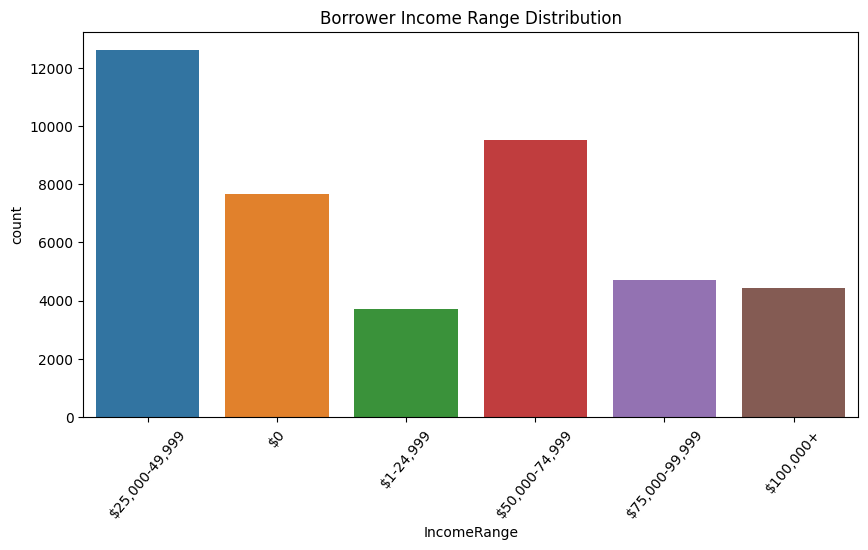

In [ ]:
#Borrower Income Range Status Distrobution

plt.figure(figsize=[10, 5])
sns.countplot(data=df,x='IncomeRange');
plt.title('Borrower Income Range Distribution')
plt.xticks(rotation=50);

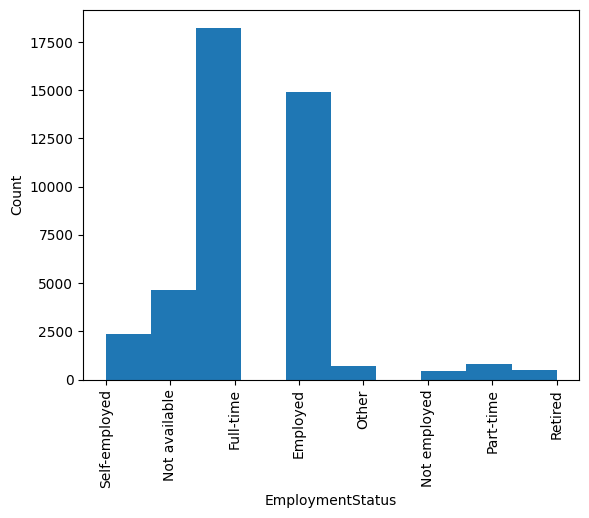

In [ ]:
#Borrower Employement Status

plt.hist(df['EmploymentStatus'])
plt.xlabel('EmploymentStatus')
plt.ylabel('Count')
plt.xticks(rotation =90)
plt.show()

(array([7.6710e+03, 1.3127e+04, 1.2207e+04, 5.0300e+03, 2.1860e+03,
        9.7900e+02, 4.5700e+02, 2.2300e+02, 1.3600e+02, 7.7000e+01,
        4.9000e+01, 3.0000e+01, 2.2000e+01, 1.7000e+01, 1.6000e+01,
        1.6000e+01, 6.0000e+00, 1.0000e+01, 9.0000e+00, 1.1000e+01,
        5.0000e+00, 7.0000e+00, 6.0000e+00, 2.0000e+00, 4.0000e+00,
        3.0000e+00, 4.0000e+00, 4.0000e+00, 2.0000e+00, 5.0000e+00,
        2.0000e+00, 2.0000e+00, 5.0000e+00, 3.0000e+00, 2.0000e+00,
        4.0000e+00, 4.0000e+00, 5.0000e+00, 3.0000e+00, 3.0000e+00,
        2.0000e+00, 4.0000e+00, 3.0000e+00, 3.0000e+00, 2.0000e+00,
        0.0000e+00, 1.0000e+00, 3.0000e+00, 4.0000e+00, 0.0000e+00,
        2.0000e+00, 2.0000e+00, 2.0000e+00, 5.0000e+00, 0.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 0.00

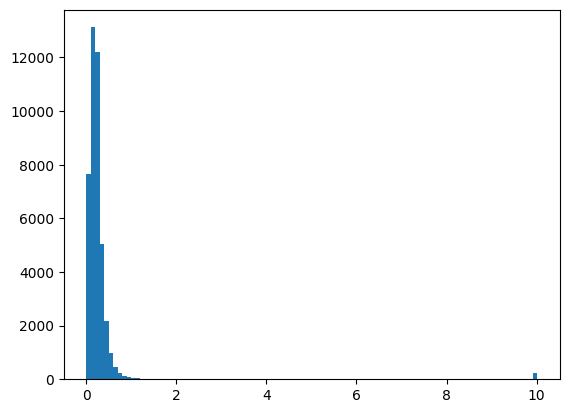

In [ ]:
#Debt-to-income Ratio

plt.hist(df['DebtToIncomeRatio'], bins = 100)
     

Text(0.5, 1.0, 'Listing Category')

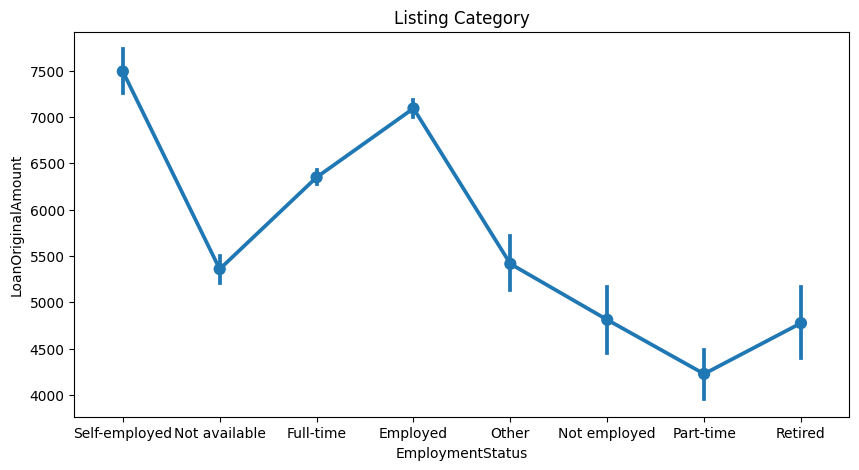

In [ ]:
plt.figure(figsize=[10, 5])
sns.pointplot(data =df, x = 'EmploymentStatus', y = 'LoanOriginalAmount')
plt.title('Listing Category')

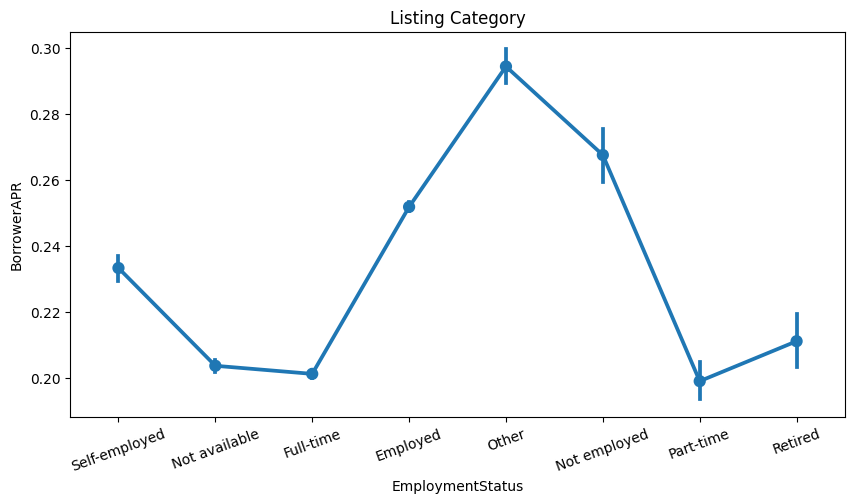

In [ ]:
plt.figure(figsize=[10, 5])
sns.pointplot(data =df, x = 'EmploymentStatus', y = 'BorrowerAPR')
plt.title('Listing Category')
plt.xticks(rotation=20);

Text(0.5, 1.0, 'Term Vs LoanStatus')

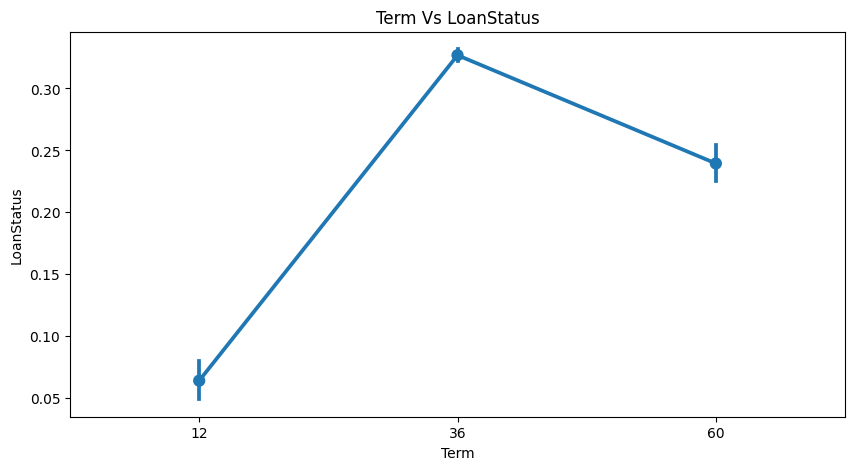

In [ ]:
plt.figure(figsize=[10, 5])
sns.pointplot(data =df, x = 'Term', y = 'LoanStatus')
plt.title('Term Vs LoanStatus')

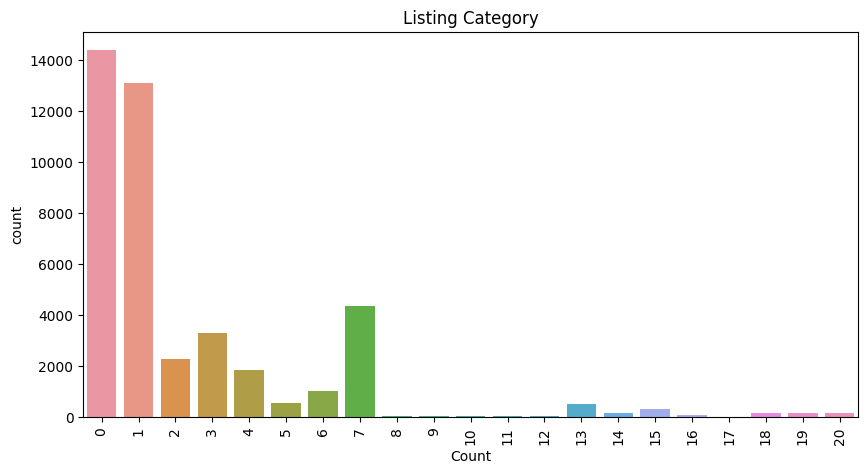

In [ ]:
#ListingCategory (numeric)

plt.figure(figsize=[10, 5])
sns.countplot(data=df,x=df['ListingCategory (numeric)'])
plt.title('Listing Category')
plt.xlabel('Count');
plt.xticks(rotation=90);

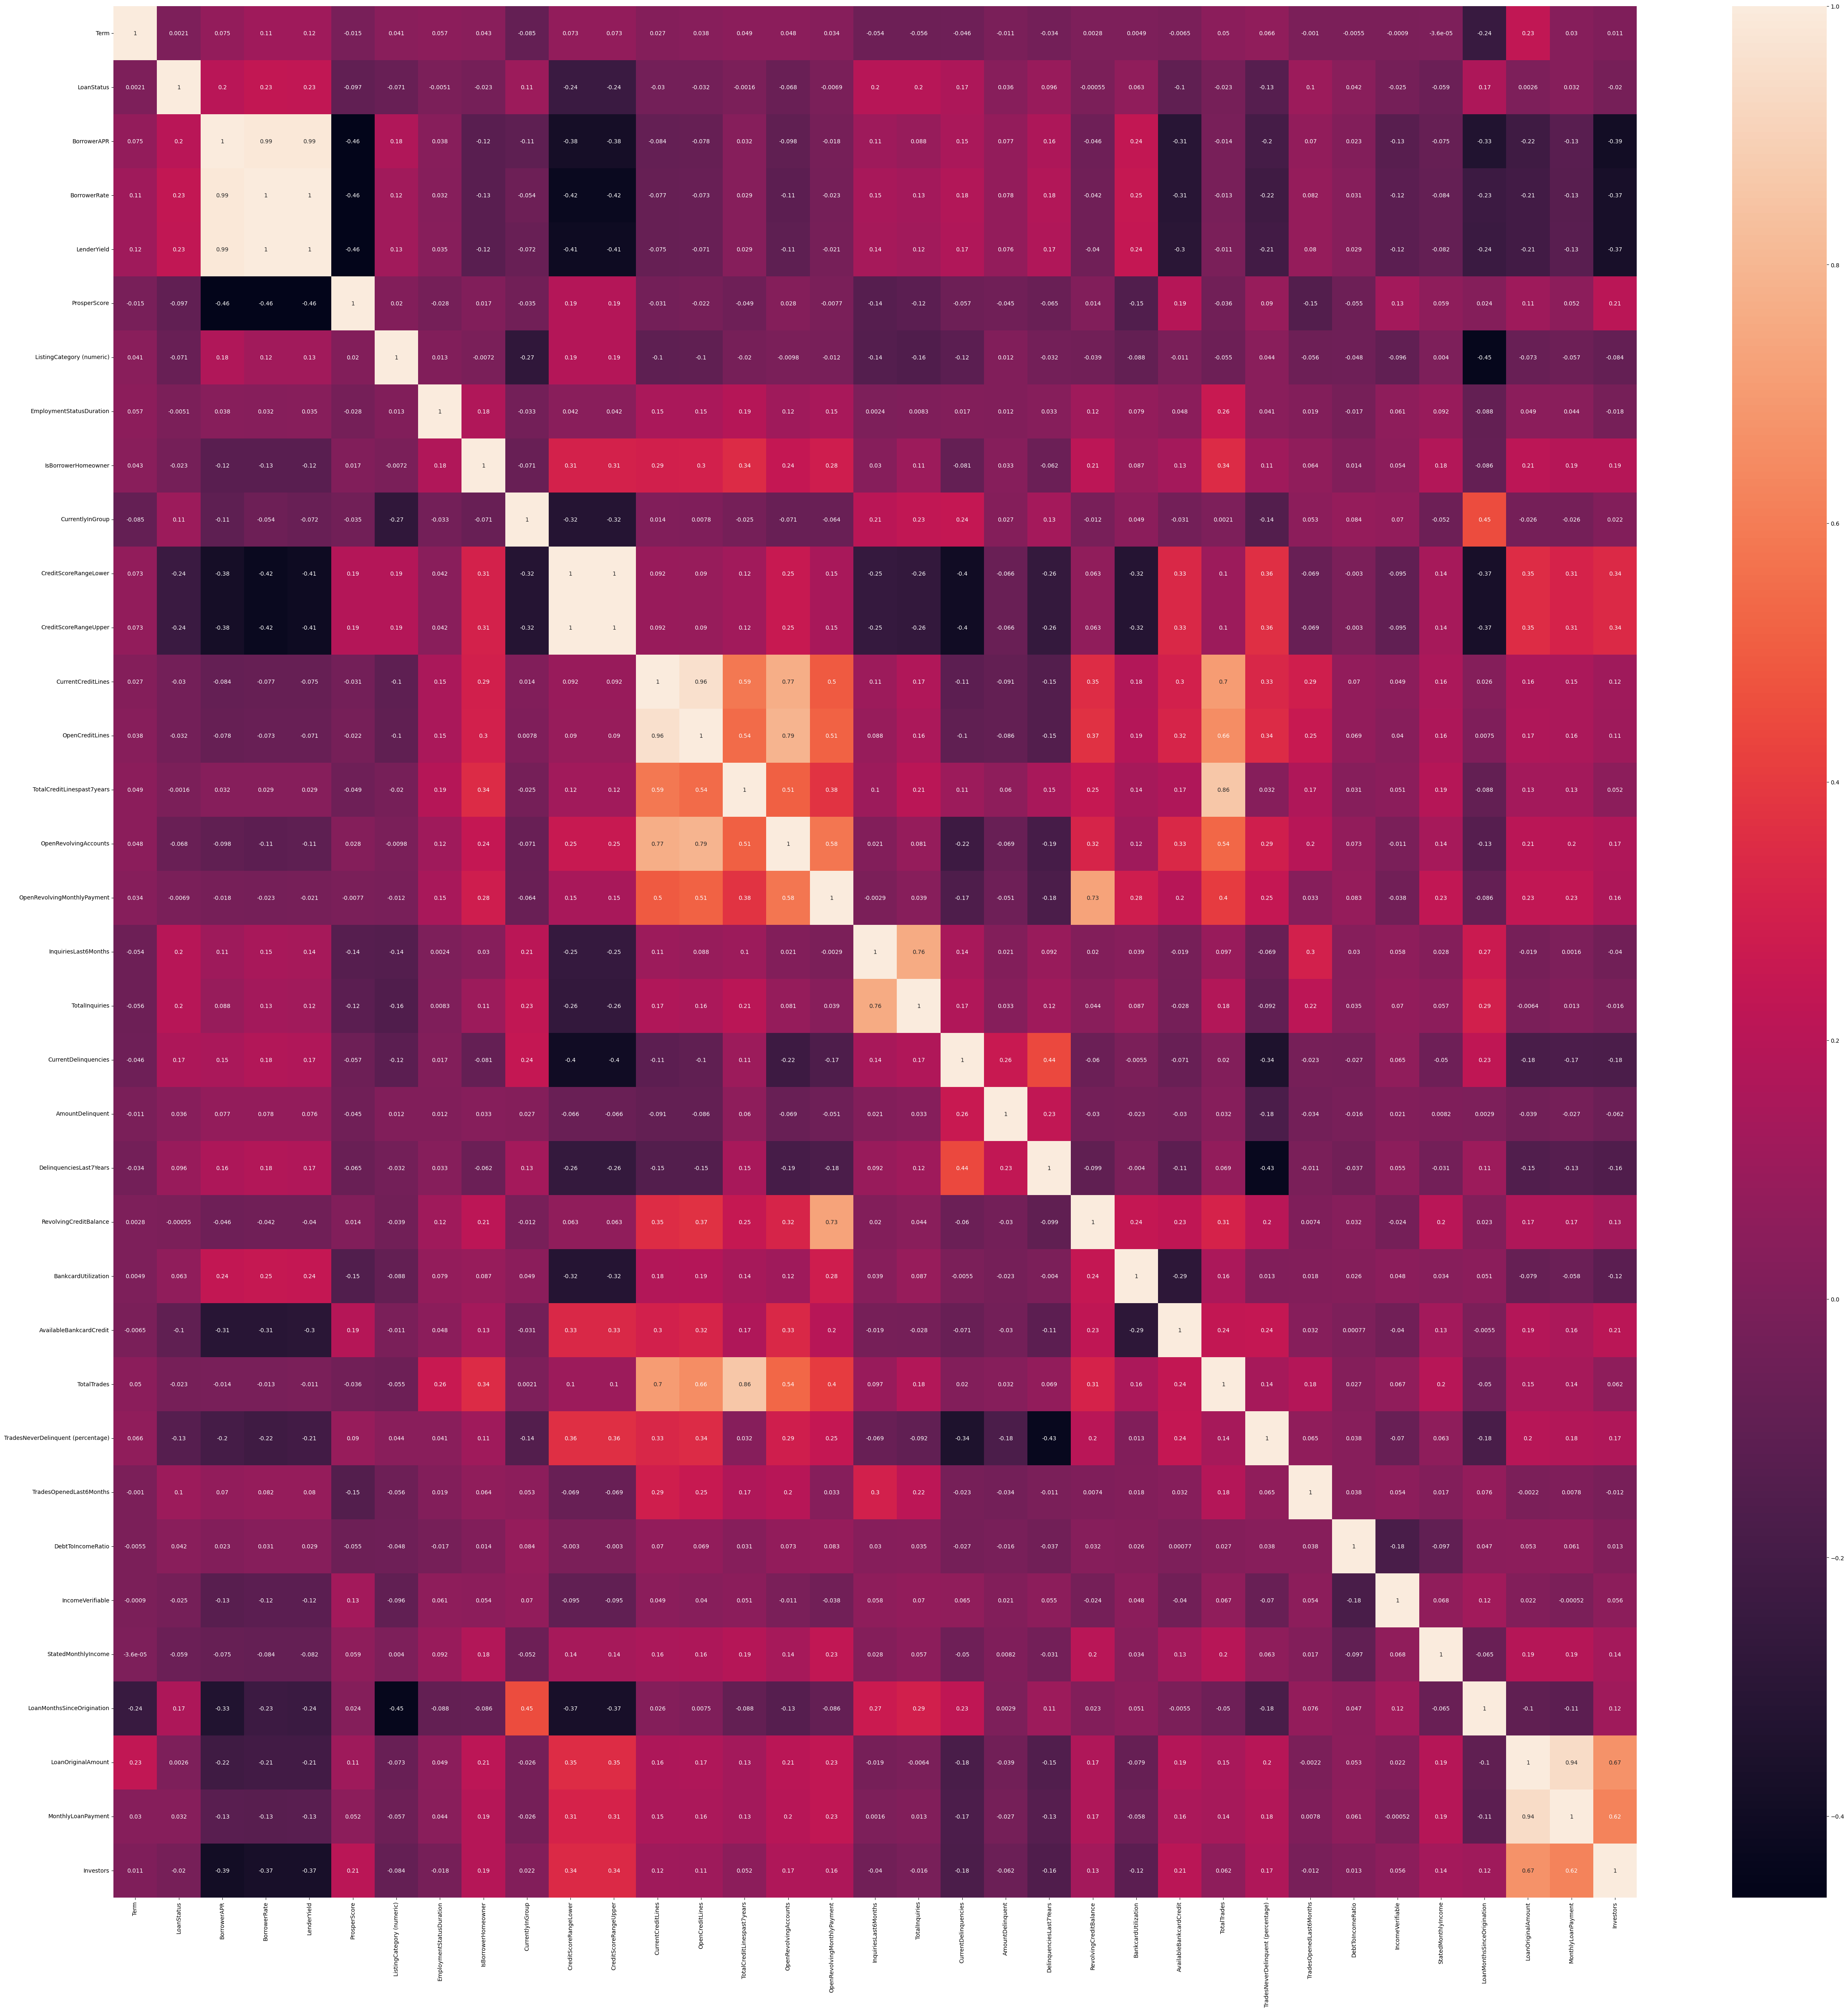

In [ ]:
# Heatmap of correlation matrix
plt.figure(figsize=(60,60)) 
sns.heatmap(df.corr(),annot = True)
plt.show()

**Research Questions**

**Action:** presentation three main focuses are on the most critical part of Peer-to-Peer Lending which is CreditGrade , BorrowerRate and Lender Yield not to mention the custom built risk assesment tool called ProsperScore to assess the creditworthiness of the borrower.

Research Question 1 : What are the most number of borrowers Credit Grade?

<Axes: xlabel='CreditGrade', ylabel='count'>

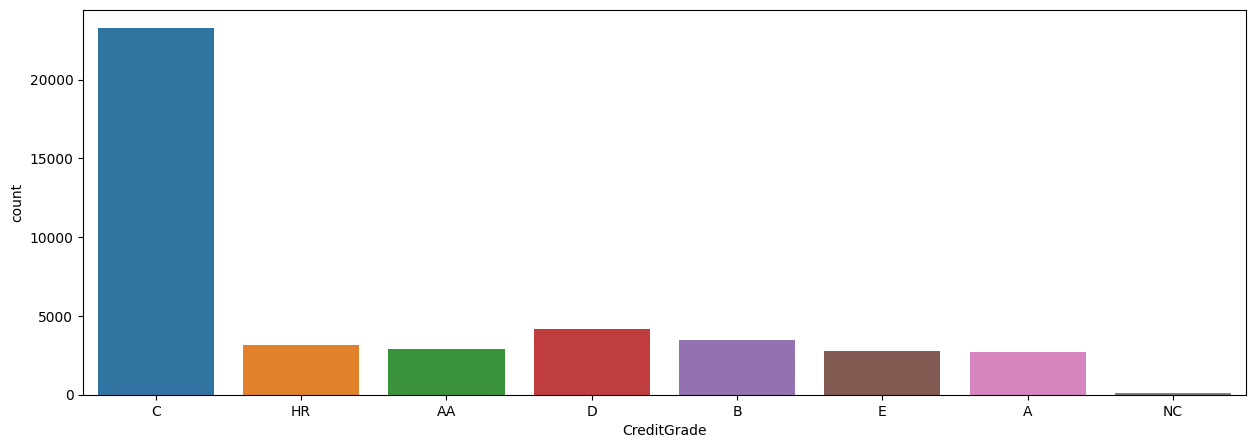

In [ ]:
# Check the univariate relationship of Credit Grade# Check the univariate relationship of Credit Grade
plt.figure(figsize=(15,5))
sns.countplot(x='CreditGrade', data=df)

Research Question 2 : Since there are so much low Credit Grade such as C and D , does it lead to a higher amount of deliquency?

In [ ]:
# Check the univariate relationship of Loan Status
plt.figure(figsize=(15,5))
freq_table = df["LoanStatus"].value_counts()
print(freq_table)

0    29238
1    13396
Name: LoanStatus, dtype: int64


<Figure size 1500x500 with 0 Axes>

Research Question 3 : What is the highest number of BorrowerRate?

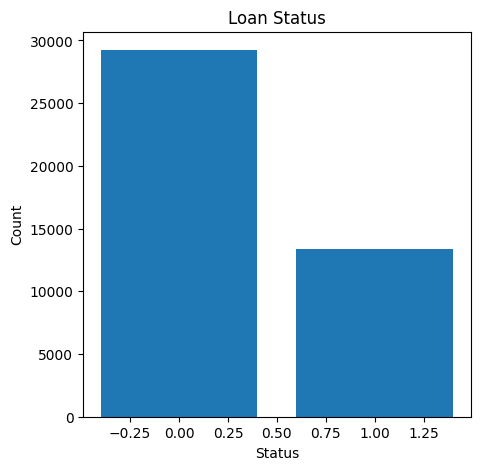

In [ ]:
# Create a bar chart of Loan Status
plt.figure(figsize=(5,5))
plt.bar(freq_table.index, freq_table.values)
plt.title("Loan Status")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

Research Question 4 : Since the highest number of Borrower Rate is between 0.1 and 0.2, does the highest number of Lender Yield is between 0.1 and 0.2?

<Axes: xlabel='LoanOriginalAmount', ylabel='BorrowerRate'>

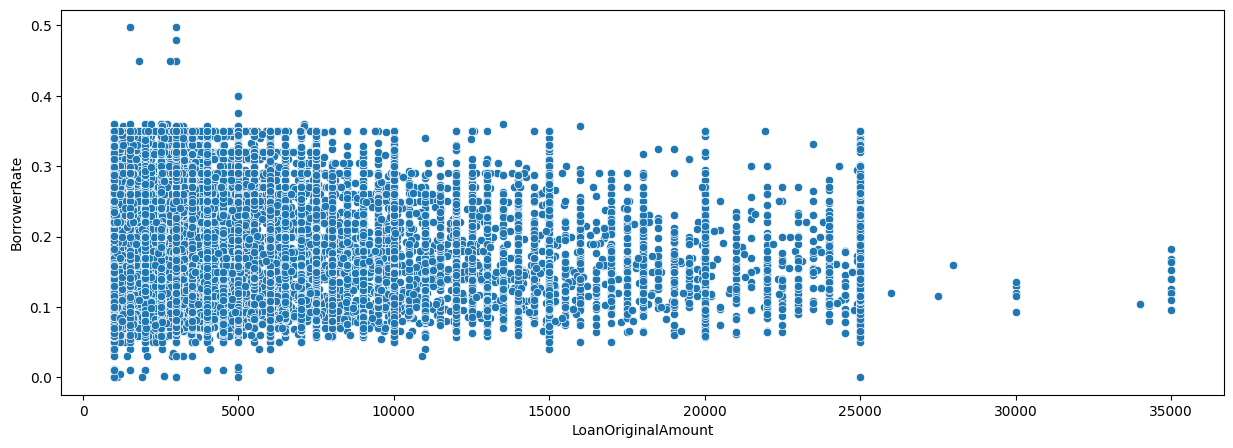

In [ ]:
# Visualize the relationship between borrower rate and loan amount
plt.figure(figsize=(15,5))
sns.scatterplot(data=df, x='LoanOriginalAmount', y='BorrowerRate')

Research Question 5 : Is the Credit Grade really accurate? Does higher Credit Grade leads to higher Monthly Loan Payment? As for Higher Credit Grade we mean from Grade AA to B

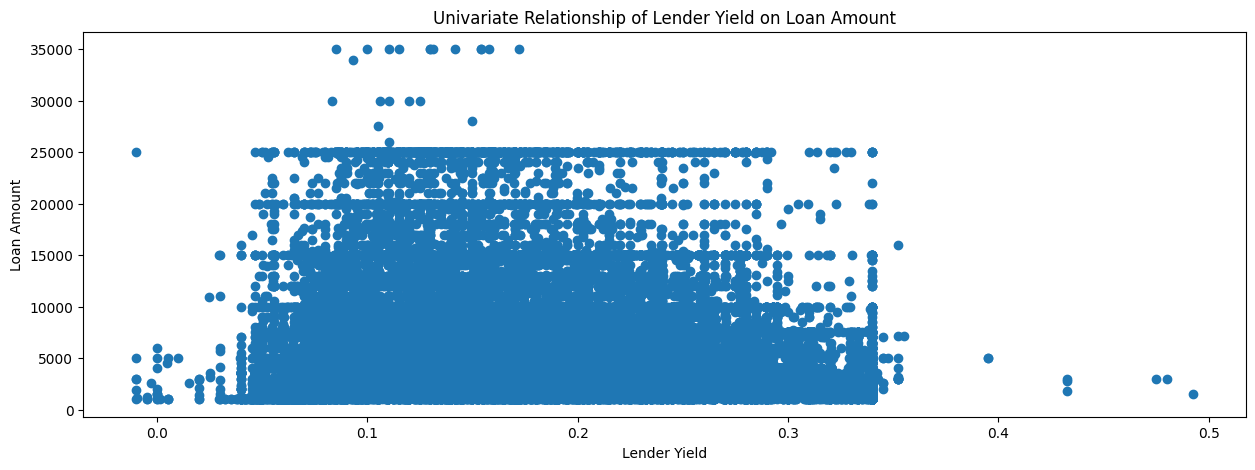

In [ ]:
# Create a scatter plot of Lender Yield vs Loan Amount
plt.figure(figsize=(15,5))
plt.scatter(df['LenderYield'], df['LoanOriginalAmount'])
plt.xlabel('Lender Yield')
plt.ylabel('Loan Amount')
plt.title('Univariate Relationship of Lender Yield on Loan Amount')
plt.show()

Research Question 6 : Here we look at the Completed Loan Status and Defaulted Rate to determine the accuracy of Credit Grade.

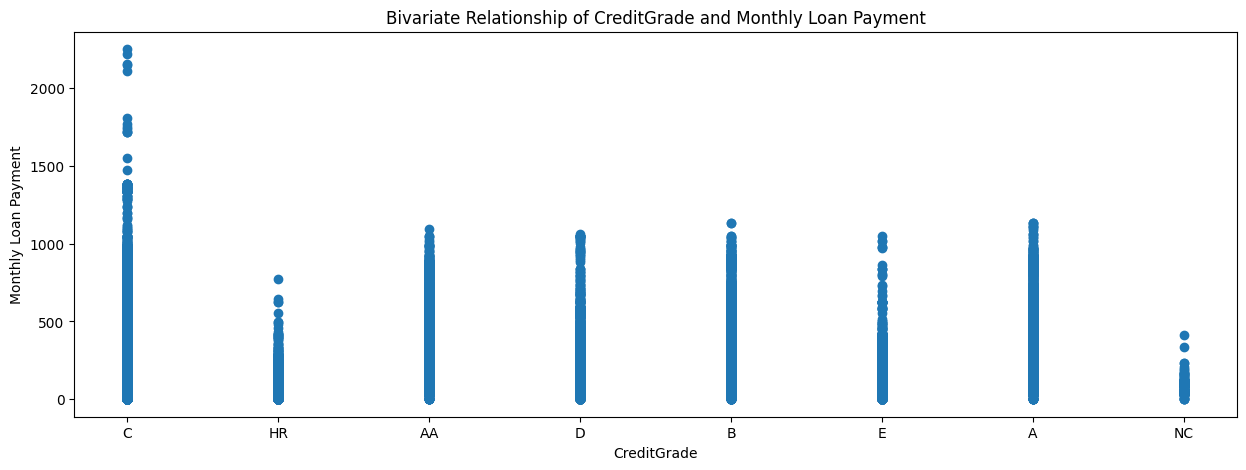

In [ ]:
# Create a scatter plot of CreditGrade vs MonthlyLoanPayment
plt.figure(figsize=(15,5))
plt.scatter(df['CreditGrade'],df['MonthlyLoanPayment'])
plt.xlabel('CreditGrade')
plt.ylabel('Monthly Loan Payment')
plt.title('Bivariate Relationship of CreditGrade and Monthly Loan Payment')
plt.show()

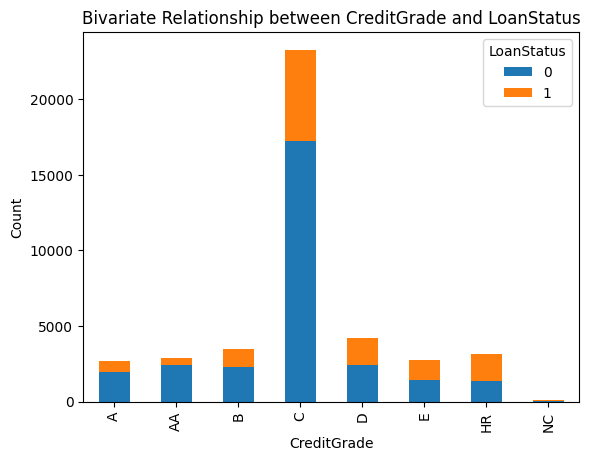

In [ ]:
# Create a contingency table of CreditGrade vs LoanStatus
ctable = pd.crosstab(df['CreditGrade'], df['LoanStatus'])
# Create a stacked bar chart of CreditGrade vs LoanStatus
ctable.plot(kind='bar', stacked=True)
plt.xlabel('CreditGrade')
plt.ylabel('Count')
plt.title('Bivariate Relationship between CreditGrade and LoanStatus')
plt.show()

Research Question 7 : Now we know the Credit Grade is accurate and is a tool that is used by the organization in determining the person’s creditworthiness. Now we need to understand does the ProsperScore, the custom built risk assesment system is being used in determing borrower’s rate?

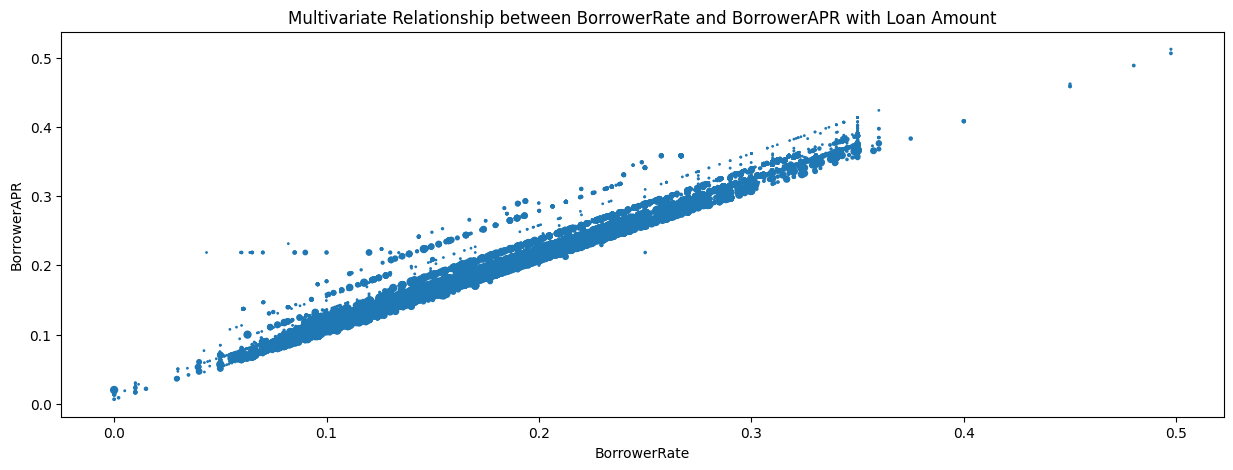

In [ ]:
# Create a scatter plot of BorrowerRate vs BorrowerAPR with LoanOriginalAmount represented by marker size
plt.figure(figsize=(15,5))
plt.scatter(df['BorrowerRate'], df['BorrowerAPR'], s=df['LoanOriginalAmount']/1000)
plt.xlabel('BorrowerRate')
plt.ylabel('BorrowerAPR')
plt.title('Multivariate Relationship between BorrowerRate and BorrowerAPR with Loan Amount')
plt.show()

# Feature engineering

outliers refer to data points that are significantly different from other data points in the same dataset. Outliers can be caused by measurement or recording errors, or they can be legitimate data points that are far away from the rest of the data due to natural variation.

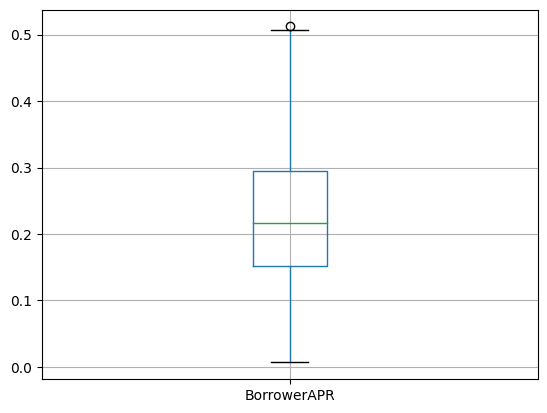

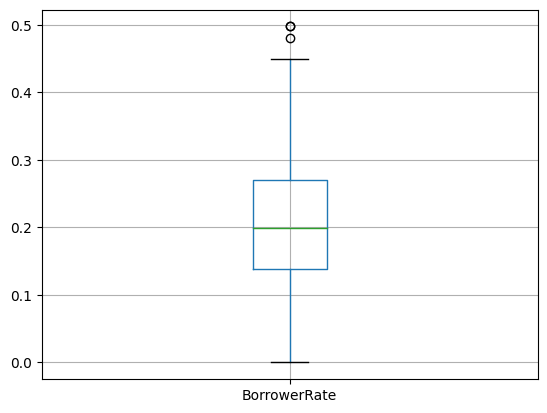

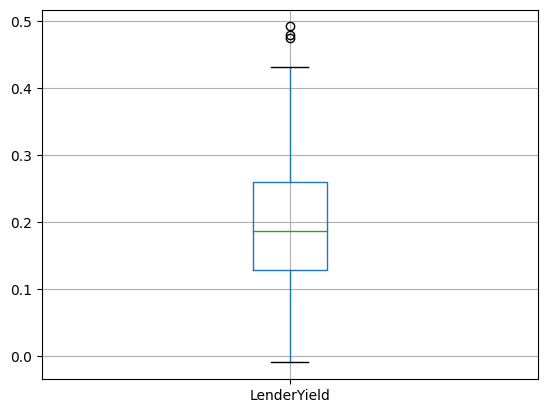

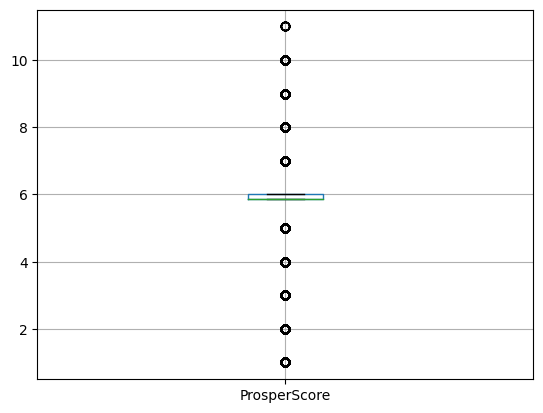

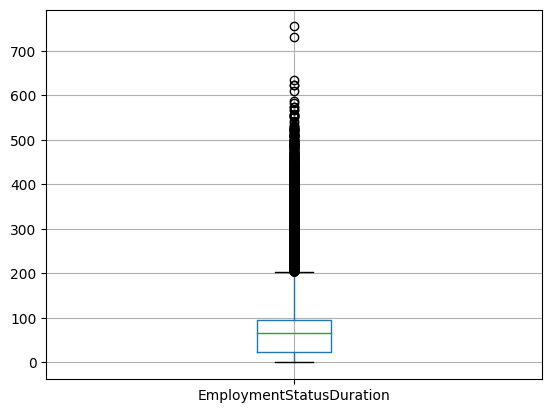

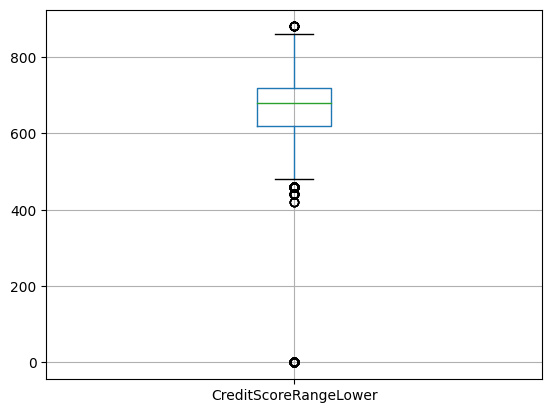

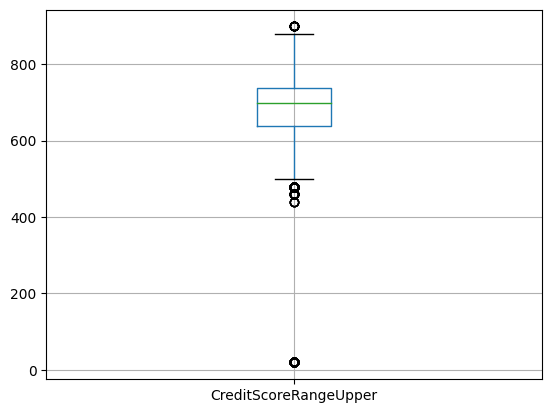

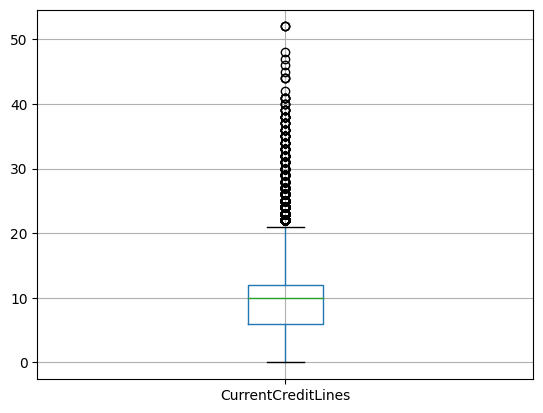

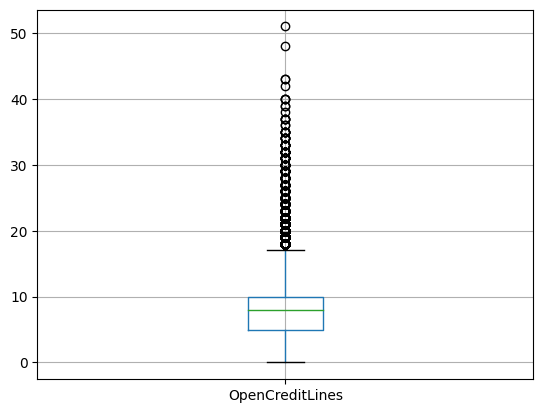

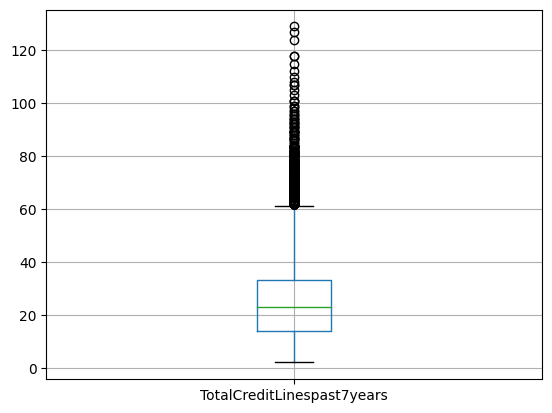

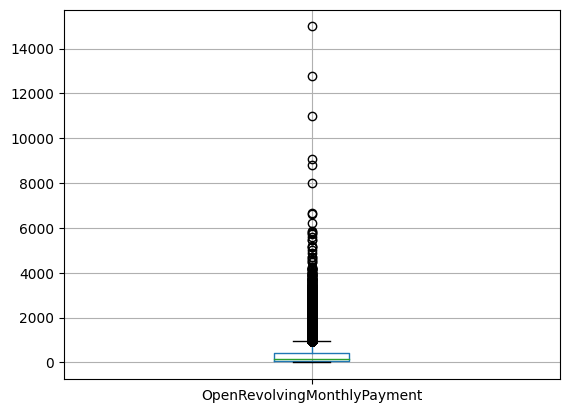

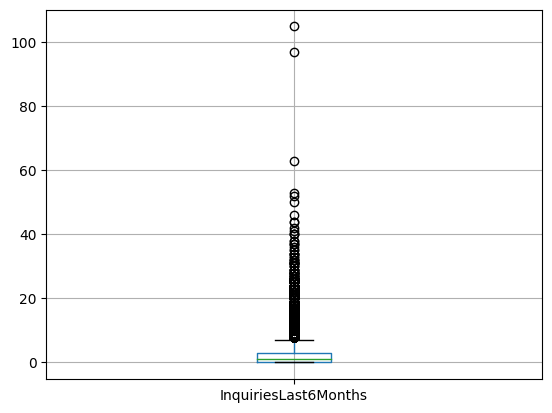

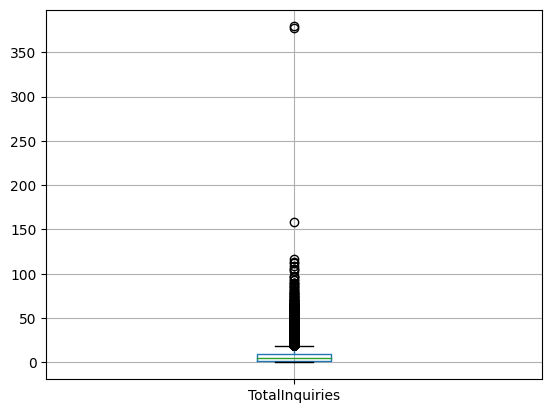

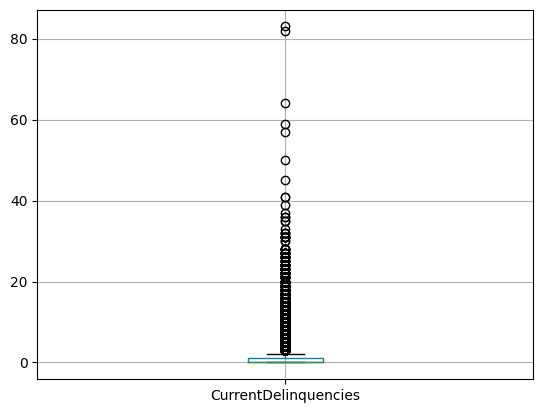

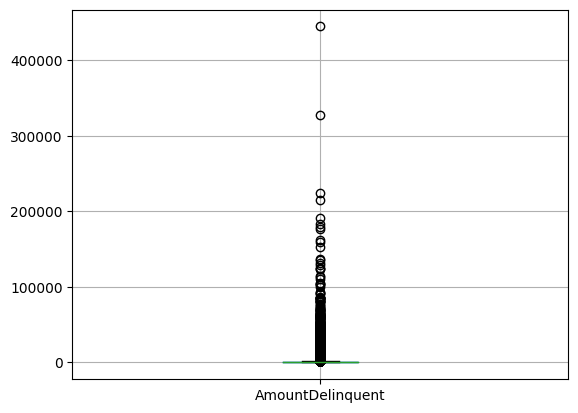

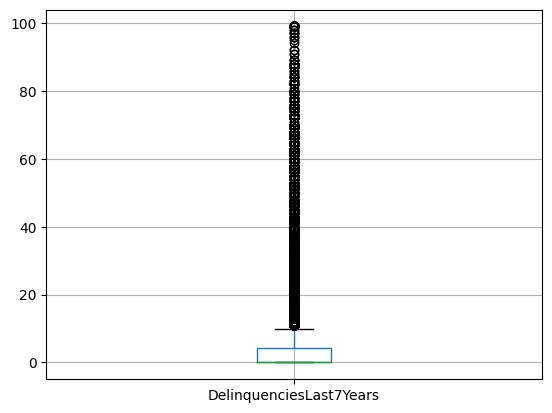

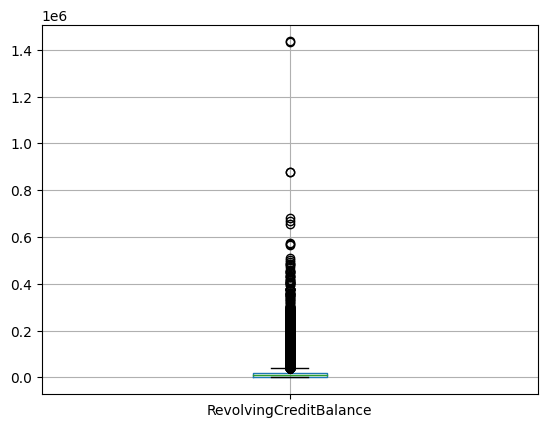

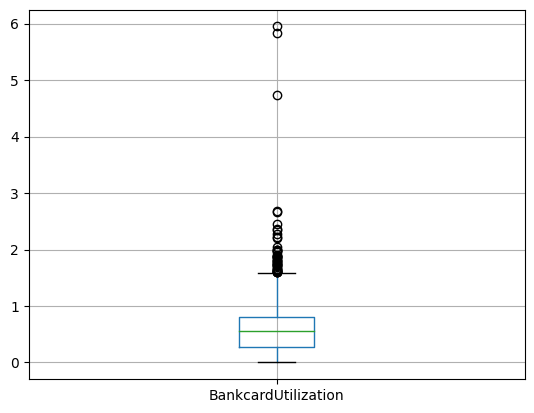

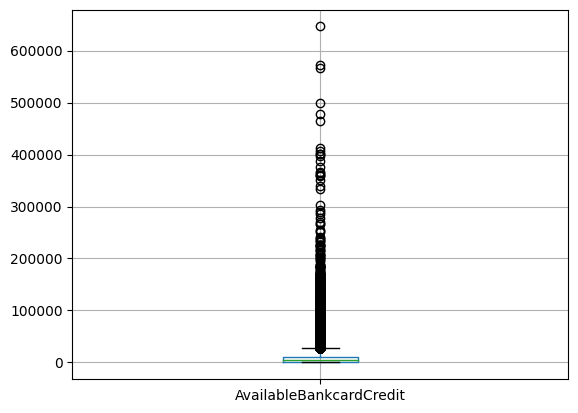

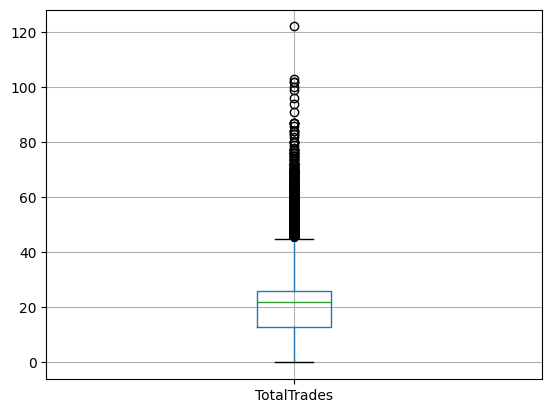

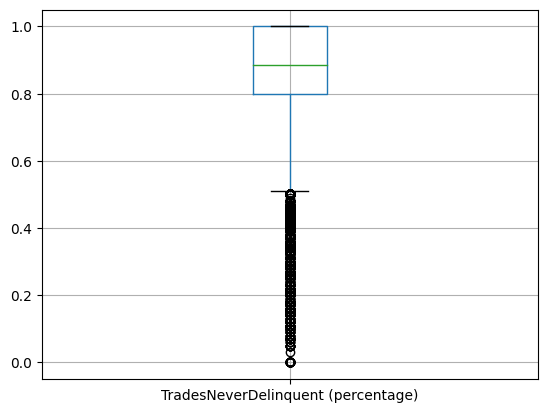

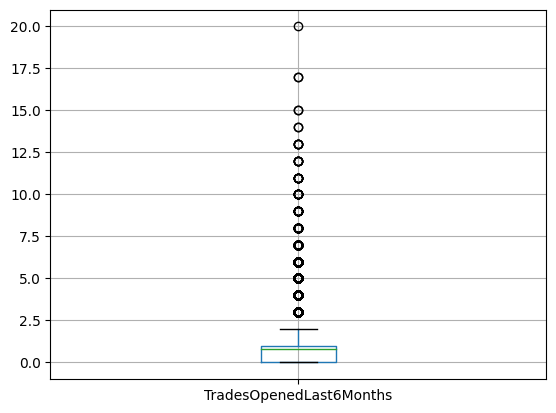

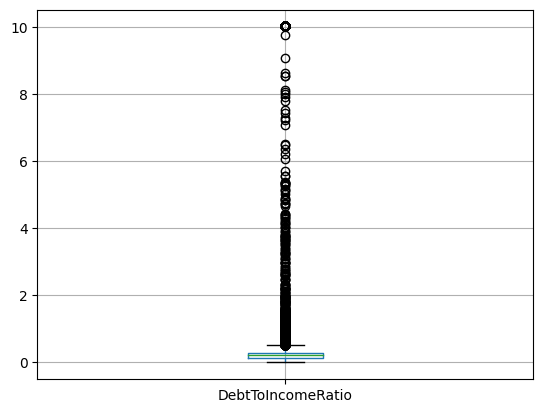

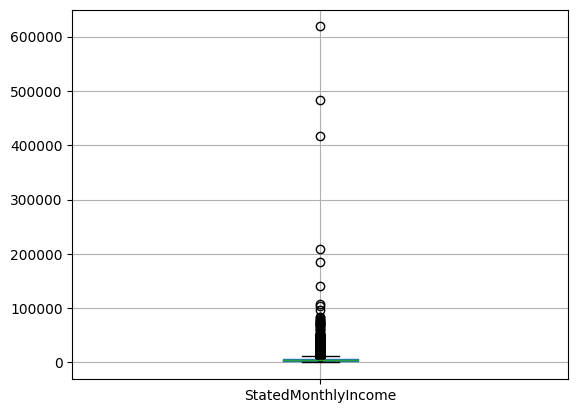

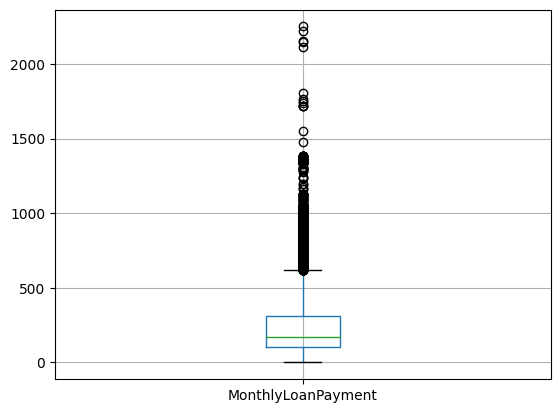

In [ ]:
#check for outliers by using boxplot
col = df.select_dtypes(include=('float')).columns
for column in col:
    plt.figure()
    df.boxplot([column])

# IQR -->  Interquartile Range

The IQR is often used in machine learning for outlier detection, as it helps identify values that fall outside of the typical range of values in the dataset. Specifically, any value that is more than 1.5 times the IQR below the first quartile (Q1) or above the third quartile (Q3) is considered an outlier.

In [ ]:
# Removing outliers from dataset by using IQR
print("shape of data set before removing outliers",df.shape)
col = df.col = df.select_dtypes(include=('float')).columns
for i in col :
  q1 = df[i].quantile(0.25)
  q3 = df[i].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1-1.5*iqr
  upper_bound = q3+1.5*iqr
  outliers = df[(df[i] < lower_bound)|(df[i] > upper_bound)]
  df = df.drop(outliers.index)
print("shape of data set after removing outliers",df.shape)

shape of data set before removing outliers (42634, 45)
shape of data set after removing outliers (9186, 45)


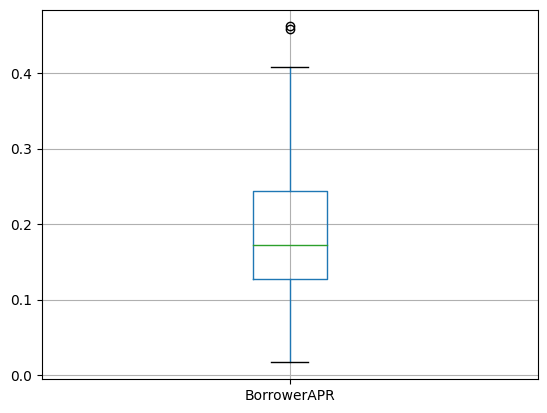

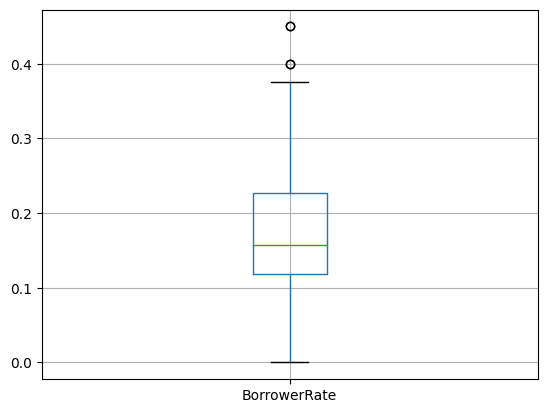

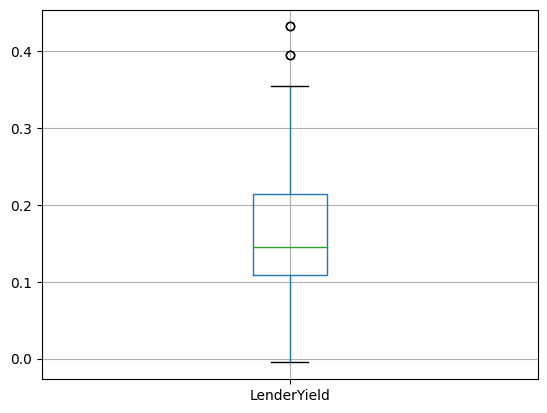

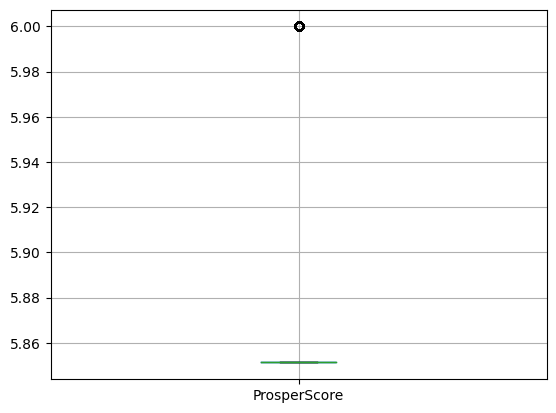

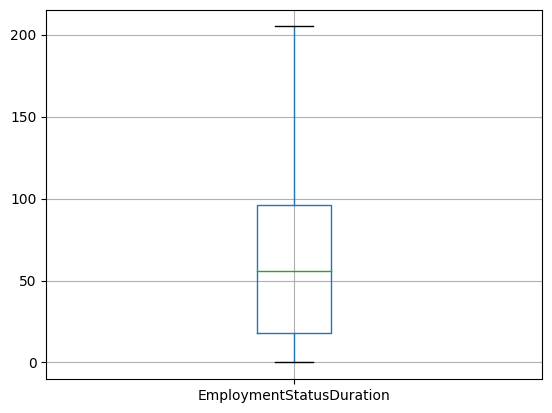

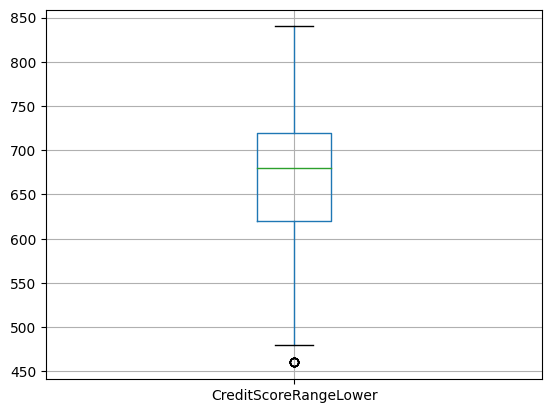

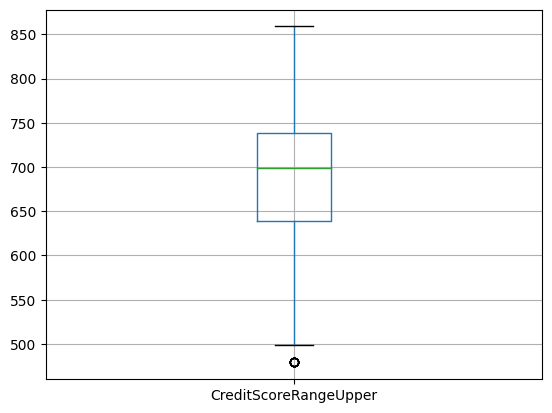

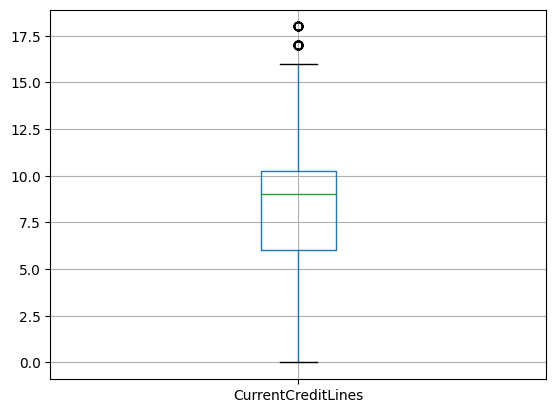

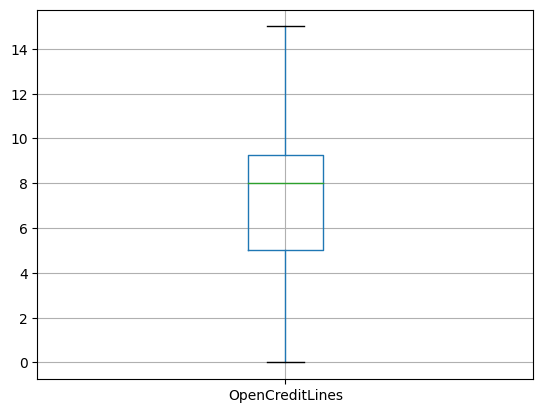

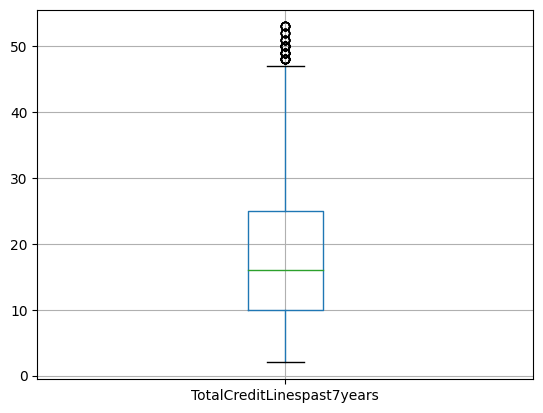

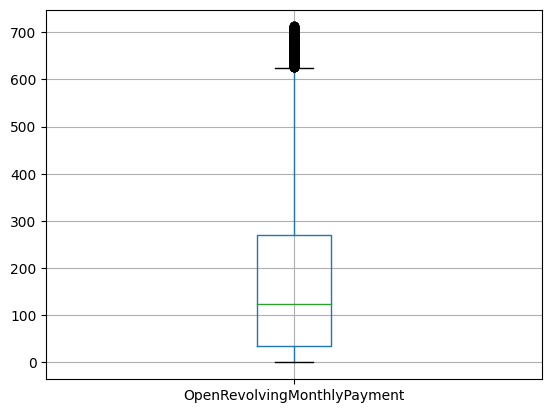

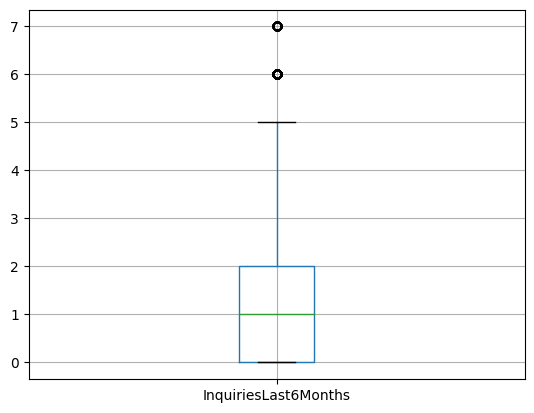

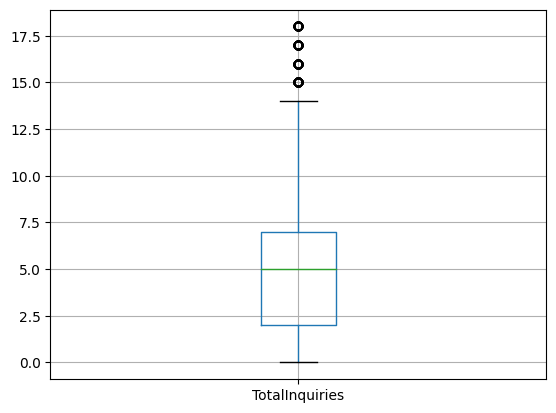

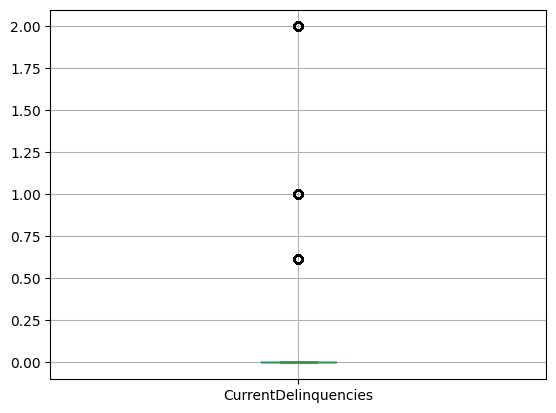

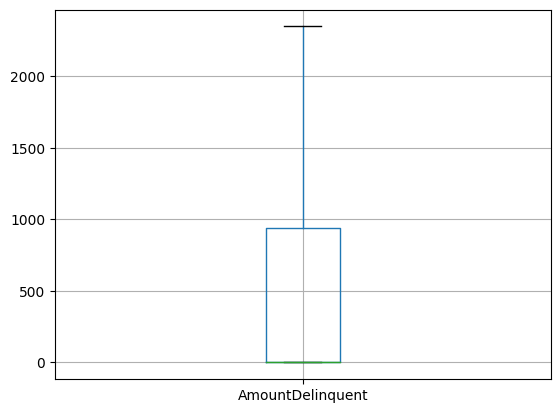

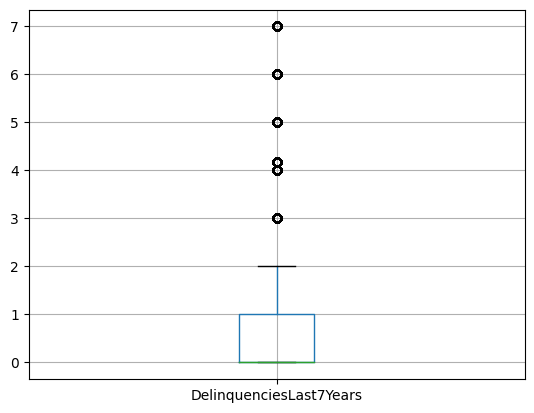

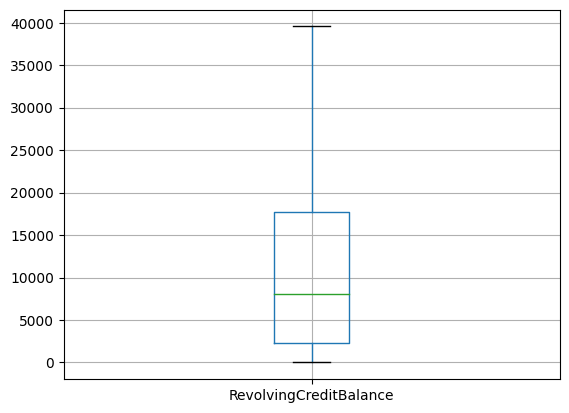

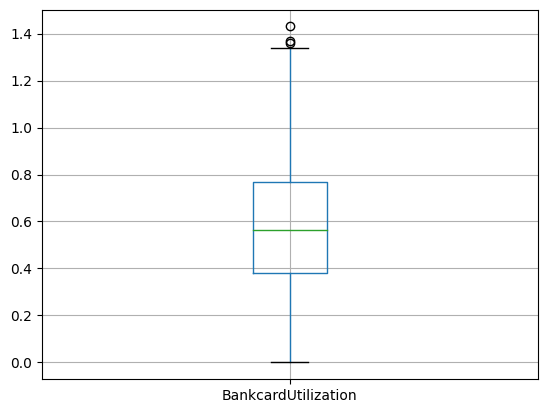

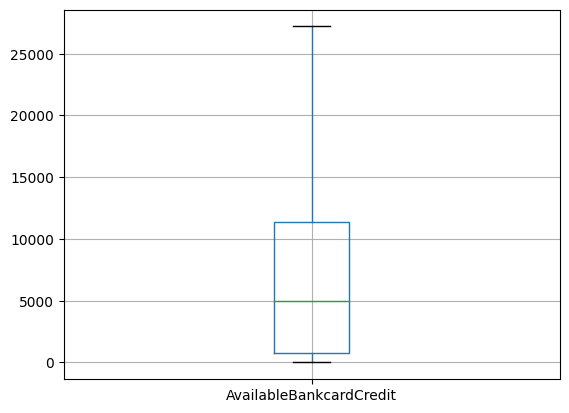

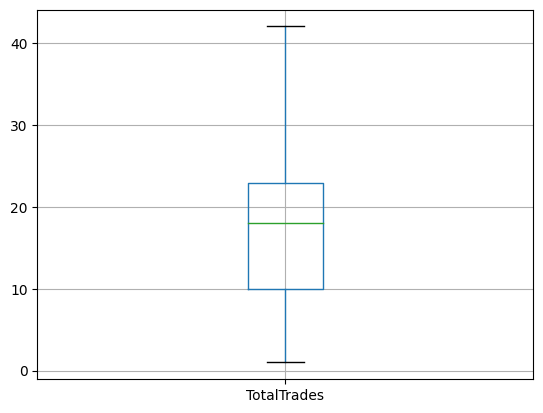

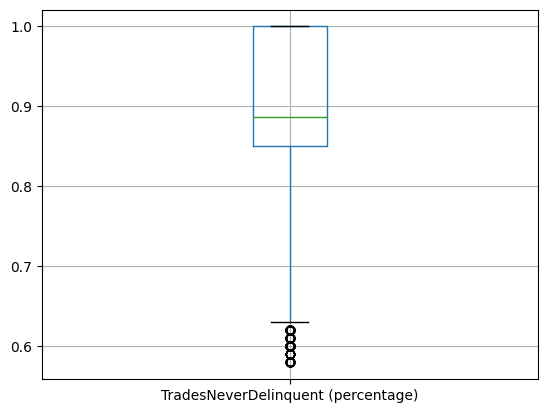

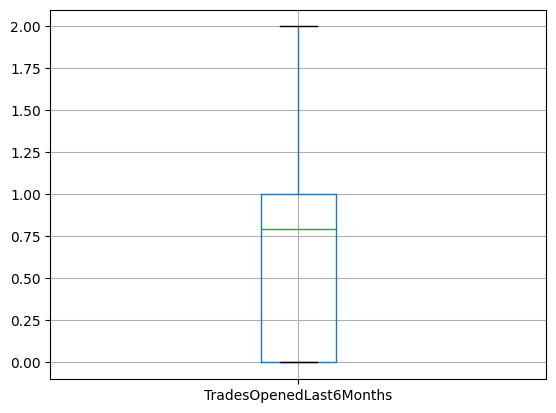

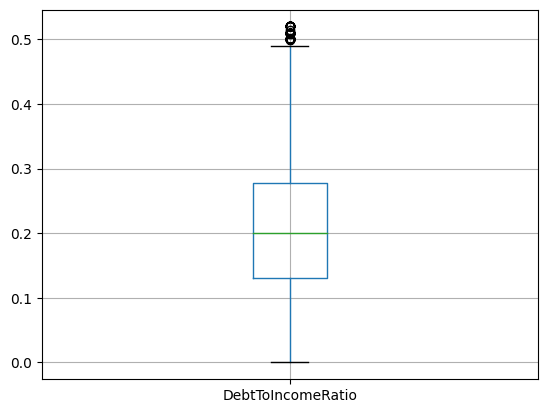

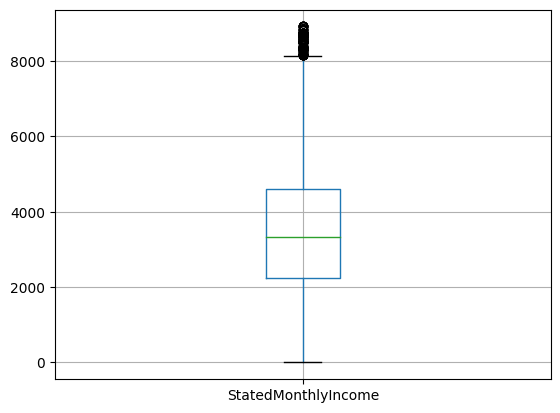

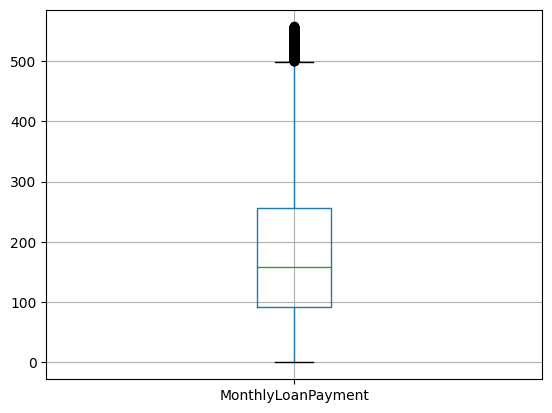

In [ ]:
#check for outliers by using boxplot
col = df.select_dtypes(include=('float')).columns
for column in col:
    plt.figure()
    df.boxplot([column])

In [ ]:
x = df.drop(['LoanStatus'],axis=1)
y = df['LoanStatus']

# Label encoding
Label encoding is a process of transforming categorical data into numerical form so that machine learning algorithms can work on them. In label encoding, each unique category is assigned a numerical value.

In [ ]:
le=LabelEncoder()
c=df.select_dtypes(include=('object')).columns
for i in c :
  df[i]=le.fit_transform(df[i])

# Pearson correlation
Pearson correlation coefficient, also known as Pearson's r, is a measure of the linear correlation between two continuous variables. It is represented by a value between -1 and 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation between the variables.

In [ ]:
from scipy.stats import pearsonr
col=df.columns
for i in col :
  a,_=pearsonr(df['LoanStatus'],df[i])
  print(i)
  print("pearsons correaltion:%.3f"%a)

ListingCreationDate
pearsons correaltion:0.029
CreditGrade
pearsons correaltion:0.191
Term
pearsons correaltion:0.014
LoanStatus
pearsons correaltion:1.000
BorrowerAPR
pearsons correaltion:0.222
BorrowerRate
pearsons correaltion:0.237
LenderYield
pearsons correaltion:0.234
ProsperScore
pearsons correaltion:0.000
ListingCategory (numeric)
pearsons correaltion:0.004
BorrowerState
pearsons correaltion:-0.009
Occupation
pearsons correaltion:0.029
EmploymentStatus
pearsons correaltion:0.049
EmploymentStatusDuration
pearsons correaltion:-0.006
IsBorrowerHomeowner
pearsons correaltion:-0.011
CurrentlyInGroup
pearsons correaltion:-0.001
DateCreditPulled
pearsons correaltion:0.026
CreditScoreRangeLower
pearsons correaltion:-0.194
CreditScoreRangeUpper
pearsons correaltion:-0.194
FirstRecordedCreditLine
pearsons correaltion:0.003
CurrentCreditLines
pearsons correaltion:-0.053
OpenCreditLines
pearsons correaltion:-0.047
TotalCreditLinespast7years
pearsons correaltion:-0.027
OpenRevolvingAccounts


# Mutual information
Mutual informationis a measure of the dependence between two variables. It measures how much information is obtained about one variable by observing the other variable. In other words, mutual information measures the amount of information that the presence or absence of one variable provides about the presence or absence of the other variable. 



In [ ]:
col=df.columns
for i in col :
  if i != "LoanStatus" :
    mi = mutual_info_score(df[i], df['LoanStatus'])
    print("Mutual information of "+i, mi*100)

Mutual information of ListingCreationDate 58.1494684650805
Mutual information of CreditGrade 2.1074033671294745
Mutual information of Term 0.06967805375456401
Mutual information of BorrowerAPR 18.997038857927844
Mutual information of BorrowerRate 11.657824291820917
Mutual information of LenderYield 11.490742380544802
Mutual information of ProsperScore 4.790038246604844e-06
Mutual information of ListingCategory (numeric) 0.1839343416376539
Mutual information of BorrowerState 0.7387204965946745
Mutual information of Occupation 1.425175972342136
Mutual information of EmploymentStatus 0.19458137349801977
Mutual information of EmploymentStatusDuration 1.3030979792982427
Mutual information of IsBorrowerHomeowner 0.0061830220027842
Mutual information of CurrentlyInGroup 2.676928107792076e-05
Mutual information of DateCreditPulled 58.1494684650805
Mutual information of CreditScoreRangeLower 2.0532455901505036
Mutual information of CreditScoreRangeUpper 2.0532455901505036
Mutual information of 

In [ ]:
col=['ProsperScore','ListingCategory (numeric)', 'BorrowerState','EmploymentStatusDuration','CurrentlyInGroup','CurrentCreditLines', 'OpenCreditLines', 
     'TotalCreditLinespast7years','OpenRevolvingAccounts','InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies','DelinquenciesLast7Years','TotalTrades',
     'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months','IncomeRange','IncomeVerifiable','LoanMonthsSinceOrigination','LoanOriginationQuarter',
     ]

In [ ]:
# drop the unwanted columns
for i in col :
  x=x.drop([i], axis='columns')

In [ ]:
numerical_cols = x.select_dtypes(include = ['int','float']).columns
categorical_cols = x.select_dtypes(include = ['object' , 'category']).columns

df = x[numerical_cols]
Categorical_df = x[categorical_cols]

# Scaling
Scaling in machine learning refers to the process of normalizing or standardizing the features (input variables) of a dataset. The main goal of scaling is to bring all the features on the same scale so that they can be compared and analyzed without any bias.

In [ ]:
# extract columns to be scaled
scaling_columns =df.columns
# initialize scaler
scaler = MinMaxScaler()

# fit scaler on data
scaler.fit(df[scaling_columns])

# transform data using scaler
df = scaler.transform(df[scaling_columns])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# create an instance of the OneHotEncoder class
encoder = OneHotEncoder()
cols_to_encode=Categorical_df.columns
# fit the encoder to the selected columns and transform the columns into one-hot encoded format
Categorical_df = encoder.fit_transform(Categorical_df).toarray()

In [ ]:
df.shape

(9186, 16)

# PCA--> Principal Component Analysis

Principal Component Analysis (PCA) is a technique used to reduce the dimensionality of high-dimensional data by projecting it onto a lower-dimensional space. It is particularly useful when dealing with large datasets with many features or variables.

In [ ]:
# Create a PCA instance with n_components = 6
pca = PCA(n_components=6)
# Fit and transform the dataset
X_pca = pca.fit_transform(df)
# Compute the explained variance
explained_variance = pca.explained_variance_ratio_
# Compute the total variance retained
total_variance_retained = sum(explained_variance)
# Print the explained variance and the total variance retained
print("Explained variance:", explained_variance)
print("Total variance retained:", total_variance_retained)


Explained variance: [0.25309172 0.19120214 0.15136085 0.10079747 0.09105535 0.06653712]
Total variance retained: 0.8540446567673348
